# **INN Hotels Project**


## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

## Key Questions to Be Answered
* Who are our customers?
* What does their historical activity look like?
* What is our cancelation rate?
* What are the key drivers behind cancelation/not canceling?
* Can we build a reliable model to predict future behavior?

**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd

from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

## Load and overview the dataset

In [2]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.

# I am also going to CREATE A NEW FEATURE by combining the three date columns into one.

data = pd.read_csv("INNHotelsGroup.csv", parse_dates= {"date" : ["arrival_date", "arrival_month","arrival_year"]})
data

date Booking_ID  no_of_adults  no_of_children  \
0       2 10 2017   INN00001             2               0   
1       6 11 2018   INN00002             2               0   
2       28 2 2018   INN00003             1               0   
3       20 5 2018   INN00004             2               0   
4       11 4 2018   INN00005             2               0   
...           ...        ...           ...             ...   
36270    3 8 2018   INN36271             3               0   
36271  17 10 2018   INN36272             2               0   
36272    1 7 2018   INN36273             2               0   
36273   21 4 2018   INN36274             2               0   
36274  30 12 2018   INN36275             2               0   

       no_of_weekend_nights  no_of_week_nights type_of_meal_plan  \
0                         1                  2       Meal Plan 1   
1                         2                  3      Not Selected   
2                         2                  1       Meal Plan 1   
3                         0                  2       Meal Plan 1   
4                         1                  1      Not Selected   
...                     ...                ...               ...   
36270                     2                  6       Meal Plan 1   
36271                     1                  3       Meal Plan 1   
36272                     2                  6       Meal Plan 1   
36273                     0                  3      Not Selected   
36274                     1                  2       Meal Plan 1   

       required_car_parking_space room_type_reserved  lead_time  \
0                               0        Room_Type 1        224   
1                               0        Room_Type 1          5   
2                               0        Room_Type 1          1   
3                               0        Room_Type 1        211   
4                               0        Room_Type 1         48   
...                           ...                ...        ...   
36270                           0        Room_Type 4         85   
36271                           0        Room_Type 1        228   
36272                           0        Room_Type 1        148   
36273                           0        Room_Type 1         63   
36274                           0        Room_Type 1        207   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
36270              Online               0                             0   
36271              Online               0                             0   
36272              Online               0                             0   
36273              Online               0                             0   
36274             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                                     0              167.80   
36271                                     0               90.95   
36272                                     0               98.39   
36273                                     0               94.50   
36274   

### Feature Creation

In [3]:
# I am changing the new column to 'date time' 

data['date']=pd.to_datetime(data['date'], errors='coerce')

In [4]:
# I am also going to CREATE A NEW FEATURE called 'month'
data['month'] = data['date'].dt.month

In [5]:
# I am also going to CREATE A NEW FEATURE called week of the year by extracting # the weeks 1-52

data['week_of_year'] = data.date.apply(lambda x: x.weekofyear)

*### **`Two columns have a lot of zeros, that otherwise provide valuable information: Median Fill`**

In [6]:
# In my review there are 0s in two important columns and i am going to fill those with the median as they were not cpauted @ POS

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy='median')
cols = ["lead_time", "avg_price_per_room"]

In [7]:
imputer = rep_0.fit(data[cols]) 
data[cols] = imputer.transform(data[cols])


### No Missing Data?

In [8]:
# Do we have any missing data as a %

missing_count = data.isnull().sum()  # the count of missing values
value_count = data.isnull().count()  # the count of all values
missing_percentage = round(
    missing_count / value_count * 100, 2
)  # the percentage of missing values

missing_data = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})

# create a dataframe
print(missing_data)

                                      count  percentage
date                                     37        0.10
Booking_ID                                0        0.00
no_of_adults                              0        0.00
no_of_children                            0        0.00
no_of_weekend_nights                      0        0.00
no_of_week_nights                         0        0.00
type_of_meal_plan                         0        0.00
required_car_parking_space                0        0.00
room_type_reserved                        0        0.00
lead_time                                 0        0.00
market_segment_type                       0        0.00
repeated_guest                            0        0.00
no_of_previous_cancellations              0        0.00
no_of_previous_bookings_not_canceled      0        0.00
avg_price_per_room                        0        0.00
no_of_special_requests                    0        0.00
booking_status                            0     

In [9]:
# There is missing data which follows a pattern. I am going to drop those rows that don't have dates and keep the rest.
data = data.dropna(subset=['date', 'month', 'week_of_year'])
 

In [10]:
# Do we have any missing data as a %; ITS FIXED!



missing_count = data.isnull().sum()  # the count of missing values
value_count = data.isnull().count()  # the count of all values
missing_percentage = round(
    missing_count / value_count * 100, 2
)  # the percentage of missing values

missing_data = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})

# create a dataframe
print(missing_data)

                                      count  percentage
date                                      0        0.00
Booking_ID                                0        0.00
no_of_adults                              0        0.00
no_of_children                            0        0.00
no_of_weekend_nights                      0        0.00
no_of_week_nights                         0        0.00
type_of_meal_plan                         0        0.00
required_car_parking_space                0        0.00
room_type_reserved                        0        0.00
lead_time                                 0        0.00
market_segment_type                       0        0.00
repeated_guest                            0        0.00
no_of_previous_cancellations              0        0.00
no_of_previous_bookings_not_canceled      0        0.00
avg_price_per_room                        0        0.00
no_of_special_requests                    0        0.00
booking_status                            0     

In [11]:
data.describe().T

count   mean   std  min   25%    50%  \
no_of_adults                         36238.00   1.85  0.52 0.00  2.00   2.00   
no_of_children                       36238.00   0.11  0.40 0.00  0.00   0.00   
no_of_weekend_nights                 36238.00   0.81  0.87 0.00  0.00   1.00   
no_of_week_nights                    36238.00   2.20  1.41 0.00  1.00   2.00   
required_car_parking_space           36238.00   0.03  0.17 0.00  0.00   0.00   
lead_time                            36238.00  87.45 84.52 1.00 22.00  61.00   
repeated_guest                       36238.00   0.03  0.16 0.00  0.00   0.00   
no_of_previous_cancellations         36238.00   0.02  0.37 0.00  0.00   0.00   
no_of_previous_bookings_not_canceled 36238.00   0.15  1.75 0.00  0.00   0.00   
avg_price_per_room                   36238.00 104.94 32.68 0.50 81.00 100.00   
no_of_special_requests               36238.00   0.62  0.79 0.00  0.00   0.00   
month                                36238.00   6.96  3.26 1.00  4.00   7.00   
week_of_year                         36238.00  28.43 14.33 1.00 16.00  30.00   

                                        75%    max  
no_of_adults                           2.00   4.00  
no_of_children                         0.00  10.00  
no_of_weekend_nights                   2.00   7.00  
no_of_week_nights                      3.00  17.00  
required_car_parking_space             0.00   1.00  
lead_time                            126.00 443.00  
repeated_guest                         0.00   1.00  
no_of_previous_cancellations           0.00  13.00  
no_of_previous_bookings_not_canceled   0.00  58.00  
avg_price_per_room                   120.00 540.00  
no_of_special_requests                 1.00   5.00  
month                                 10.00  12.00  
week_of_year                          41.00  52.00

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  36238 non-null  datetime64[ns]
 1   Booking_ID                            36238 non-null  object        
 2   no_of_adults                          36238 non-null  int64         
 3   no_of_children                        36238 non-null  int64         
 4   no_of_weekend_nights                  36238 non-null  int64         
 5   no_of_week_nights                     36238 non-null  int64         
 6   type_of_meal_plan                     36238 non-null  object        
 7   required_car_parking_space            36238 non-null  int64         
 8   room_type_reserved                    36238 non-null  object        
 9   lead_time                             36238 non-null  float64       
 10

In [13]:
data.head(5)

date Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0 2017-02-10   INN00001             2               0                     1   
1 2018-06-11   INN00002             2               0                     2   
2 2018-02-28   INN00003             1               0                     2   
3 2018-05-20   INN00004             2               0                     0   
4 2018-11-04   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time market_segment_type  repeated_guest  \
0        Room_Type 1     224.00             Offline               0   
1        Room_Type 1       5.00              Online               0   
2        Room_Type 1       1.00              Online               0   
3        Room_Type 1     211.00              Online               0   
4        Room_Type 1      48.00              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests booking_status  month  \
0               65.00                       0   Not_Canceled   2.00   
1              106.68                       1   Not_Canceled   6.00   
2               60.00                       0       Canceled   2.00   
3              100.00                       0       Canceled   5.00   
4               94.50                       0       Canceled  11.00   

   week_of_year  
0          6.00  
1         24.00  
2          9.00  
3         20.00  
4         44.00

In [14]:
# I am drppping Booking ID as it's a system generated number
# I am dropping the cobined date field

data = data.drop(columns=['Booking_ID'])
data = data.drop(columns=['date'])
data.head(25)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0              2               0                     1                  2   
1              2               0                     2                  3   
2              1               0                     2                  1   
3              2               0                     0                  2   
4              2               0                     1                  1   
5              2               0                     0                  2   
6              2               0                     1                  3   
7              2               0                     1                  3   
8              3               0                     0                  4   
9              2               0                     0                  5   
10             1               0                     1                  0   
11             1               0                     2                  1   
12             2               0                     2                  1   
13             1               0                     2                  0   
14             2               0                     0                  2   
15             2               0                     0                  2   
16             1               0                     1                  0   
17             2               0                     1                  3   
18             2               0                     2                  2   
19             2               0                     1                  0   
20             2               0                     2                  2   
21             1               0                     0                  1   
22             2               0                     2                  4   
23             2               0                     0                  3   
24             2               0                     2                  1   

   type_of_meal_plan  required_car_parking_space room_type_reserved  \
0        Meal Plan 1                           0        Room_Type 1   
1       Not Selected                           0        Room_Type 1   
2        Meal Plan 1                           0        Room_Type 1   
3        Meal Plan 1                           0        Room_Type 1   
4       Not Selected                           0        Room_Type 1   
5        Meal Plan 2                           0        Room_Type 1   
6        Meal Plan 1                           0        Room_Type 1   
7        Meal Plan 1                           0        Room_Type 4   
8        Meal Plan 1                           0        Room_Type 1   
9        Meal Plan 1                           0        Room_Type 4   
10      Not Selected                           0        Room_Type 1   
11       Meal Plan 1                           0        Room_Type 4   
12      Not Selected                           0        Room_Type 1   
13       Meal Plan 1                           0        Room_Type 1   
14       Meal Plan 1                           0        Room_Type 1   
15       Meal Plan 2                           0        Room_Type 1   
16       Meal Plan 1                           0        Room_Type 1   
17      Not Selected                           0        Room_Type 1   
18       Meal Plan 1                           0        Room_Type 1   
19       Meal Plan 1                           0        Room_Type 1   
20       Meal Plan 1                           0        Room_Type 1   
21       Meal Plan 1                           0        Room_Type 1   
22       Meal Plan 1                           0        Room_Type 1   
23       Meal Plan 1                           0        Room_Type 1   
24      Not Selected                           0        Room_Type 1   

    lead_time market_segment_type  repeated_guest  \
0      224.00             Offline               0   
1        5.00              Online               

In [15]:
# Do we have any missing data as a %

missing_count = data.isnull().sum()  # the count of missing values
value_count = data.isnull().count()  # the count of all values
missing_percentage = round(
    missing_count / value_count * 100, 2
)  # the percentage of missing values

missing_data = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})

# create a dataframe
print(missing_data)

                                      count  percentage
no_of_adults                              0        0.00
no_of_children                            0        0.00
no_of_weekend_nights                      0        0.00
no_of_week_nights                         0        0.00
type_of_meal_plan                         0        0.00
required_car_parking_space                0        0.00
room_type_reserved                        0        0.00
lead_time                                 0        0.00
market_segment_type                       0        0.00
repeated_guest                            0        0.00
no_of_previous_cancellations              0        0.00
no_of_previous_bookings_not_canceled      0        0.00
avg_price_per_room                        0        0.00
no_of_special_requests                    0        0.00
booking_status                            0        0.00
month                                     0        0.00
week_of_year                              0     

In [16]:
# all fo the data now looks good
data.describe().T

count   mean   std  min   25%    50%  \
no_of_adults                         36238.00   1.85  0.52 0.00  2.00   2.00   
no_of_children                       36238.00   0.11  0.40 0.00  0.00   0.00   
no_of_weekend_nights                 36238.00   0.81  0.87 0.00  0.00   1.00   
no_of_week_nights                    36238.00   2.20  1.41 0.00  1.00   2.00   
required_car_parking_space           36238.00   0.03  0.17 0.00  0.00   0.00   
lead_time                            36238.00  87.45 84.52 1.00 22.00  61.00   
repeated_guest                       36238.00   0.03  0.16 0.00  0.00   0.00   
no_of_previous_cancellations         36238.00   0.02  0.37 0.00  0.00   0.00   
no_of_previous_bookings_not_canceled 36238.00   0.15  1.75 0.00  0.00   0.00   
avg_price_per_room                   36238.00 104.94 32.68 0.50 81.00 100.00   
no_of_special_requests               36238.00   0.62  0.79 0.00  0.00   0.00   
month                                36238.00   6.96  3.26 1.00  4.00   7.00   
week_of_year                         36238.00  28.43 14.33 1.00 16.00  30.00   

                                        75%    max  
no_of_adults                           2.00   4.00  
no_of_children                         0.00  10.00  
no_of_weekend_nights                   2.00   7.00  
no_of_week_nights                      3.00  17.00  
required_car_parking_space             0.00   1.00  
lead_time                            126.00 443.00  
repeated_guest                         0.00   1.00  
no_of_previous_cancellations           0.00  13.00  
no_of_previous_bookings_not_canceled   0.00  58.00  
avg_price_per_room                   120.00 540.00  
no_of_special_requests                 1.00   5.00  
month                                 10.00  12.00  
week_of_year                          41.00  52.00

In [17]:
# There are now 36,238 rows and 17 columns in my final data set
data.shape

(36238, 17)

### Hotel Cancelation Ratio

In [18]:
# Lets calcualte the ratio of reservations that get canceled vs those that do not.

# The cancelation rate is HIGH ... more than 1/3rd of the reservatins get canceld.

n_true = len(data.loc[data["booking_status"] == "Canceled"])
n_false = len(data.loc[data["booking_status"] == "Not_Canceled"])
print(
    "Number of canceled reservations: {0} ({1:2.2f}%)".format(
        n_true, (n_true / (n_true + n_false)) * 100
    )
)
print(
    "Number of reservations not canceled: {0} ({1:2.2f}%)".format(
        n_false, (n_false / (n_true + n_false)) * 100
    )
)

Number of canceled reservations: 11878 (32.78%)
Number of reservations not canceled: 24360 (67.22%)


In [19]:
# Making a list of all categorical variablest those columns that do not have a numbered order to them

cat_col = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Meal Plan 1     27802
Not Selected     5129
Meal Plan 2      3302
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
----------------------------------------
Room_Type 1    28105
Room_Type 4     6049
Room_Type 6      964
Room_Type 2      692
Room_Type 5      263
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
----------------------------------------
Online           23194
Offline          10518
Corporate         2011
Complementary      390
Aviation           125
Name: market_segment_type, dtype: int64
----------------------------------------
Not_Canceled    24360
Canceled        11878
Name: booking_status, dtype: int64
----------------------------------------


In [20]:
# Lets confirm the cancelation rate again ... still 1/3rd get canceled.

n_true = len(data.loc[data["booking_status"] == "Canceled"])
n_false = len(data.loc[data["booking_status"] == "Not_Canceled"])
print(
    "Number of canceled reservations: {0} ({1:2.2f}%)".format(
        n_true, (n_true / (n_true + n_false)) * 100
    )
)
print(
    "Number of reservations not canceled: {0} ({1:2.2f}%)".format(
        n_false, (n_false / (n_true + n_false)) * 100
    )
)

Number of canceled reservations: 11878 (32.78%)
Number of reservations not canceled: 24360 (67.22%)


index  no_of_adults  no_of_children  \
0                           no_of_adults          1.00           -0.02   
1                         no_of_children         -0.02            1.00   
2                   no_of_weekend_nights          0.10            0.03   
3                      no_of_week_nights          0.11            0.02   
4             required_car_parking_space          0.01            0.03   
5                              lead_time          0.09           -0.05   
6                         repeated_guest         -0.19           -0.04   
7           no_of_previous_cancellations         -0.05           -0.02   
8   no_of_previous_bookings_not_canceled         -0.12           -0.02   
9                     avg_price_per_room          0.28            0.36   
10                no_of_special_requests          0.19            0.12   
11                                 month          0.02            0.01   
12                          week_of_year          0.02            0.01   

    no_of_weekend_nights  no_of_week_nights  required_car_parking_space  \
0                   0.10               0.11                        0.01   
1                   0.03               0.02                        0.03   
2                   1.00               0.18                       -0.03   
3                   0.18               1.00                       -0.05   
4                  -0.03              -0.05                        1.00   
5                   0.04               0.14                       -0.06   
6                  -0.07              -0.10                        0.11   
7                  -0.02              -0.03                        0.03   
8                  -0.03              -0.05                        0.06   
9                  -0.03              -0.01                        0.07   
10                  0.06               0.05                        0.09   
11                 -0.00               0.01                       -0.01   
12                  0.00               0.01                       -0.01   

    lead_time  repeated_guest  no_of_previous_cancellations  \
0        0.09           -0.19                         -0.05   
1       -0.05           -0.04                         -0.02   
2        0.04           -0.07                         -0.02   
3        0.14           -0.10                         -0.03   
4       -0.06            0.11                          0.03   
5        1.00           -0.12                         -0.04   
6       -0.12            1.00                          0.39   
7       -0.04            0.39                          1.00   
8       -0.07            0.54                          0.47   
9       -0.10           -0.13                         -0.05   
10      -0.11           -0.01                         -0.00   
11       0.05            0.00                         -0.01   
12       0.05            0.00                         -0.01   

    no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                  -0.12                0.28   
1                                  -0.02                0.36   
2                                  -0.03               -0.03   
3                                  -0.05               -0.01   
4                                   0.06                0.07   
5                                  -0.07               -0.10   
6                                   0.54               -0.13   
7                                   0.47               -0.05   
8                                   1.00               -0.08   
9                                  -0.08                1.00   
10                                  0.03                0.21   
11                                  0.00                0.04   
12                                  0.00                0.04   

    no_of_special_requests  month  week_of_year  
0                     0.19   0.02          0.02  
1                     0.12   0.01          0.01  
2                

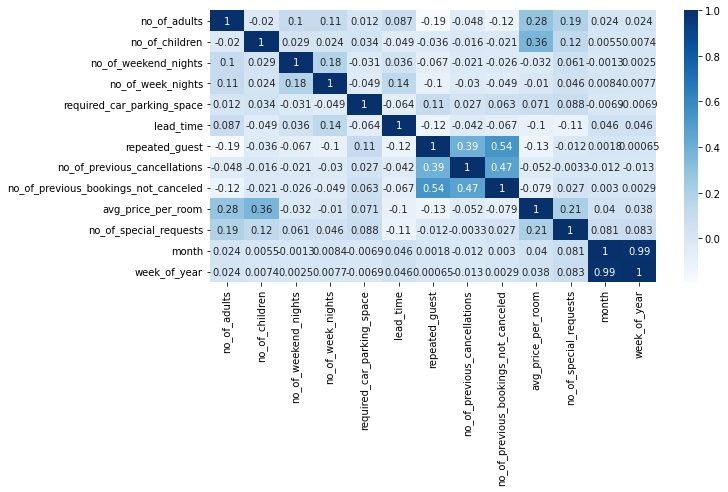

In [21]:
# Lets create the correlation matrix to see and plot the relationships between all the numerical values.

# The # of adults, children, repeat guest, and no of previous cancelations, and number of special requests all seem to have importance.

plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap='Blues', annot=True)
c = c.reset_index()
c

## Let's experiment with some new graphs we haven't learned!

Text(0.5, 1.0, 'Distribution of Avg Price by Segment ')

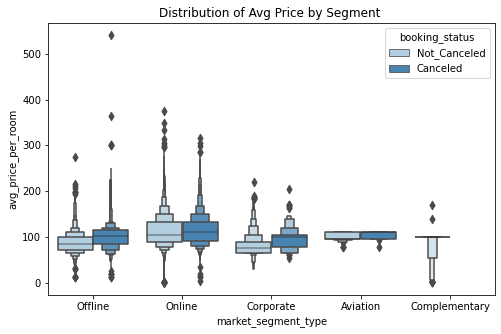

In [22]:
# This graph shows online prices have wider ranges than the rest; Aviation has a very, likely prearranged rate, narrow band.
plt.figure(figsize=(8,5))
sns.boxenplot(x='market_segment_type', y='avg_price_per_room', data=data, palette='Blues', hue='booking_status')
plt.title("Distribution of Avg Price by Segment ")

Text(0.5, 1.0, 'Distribution of Lead Time by Segment')

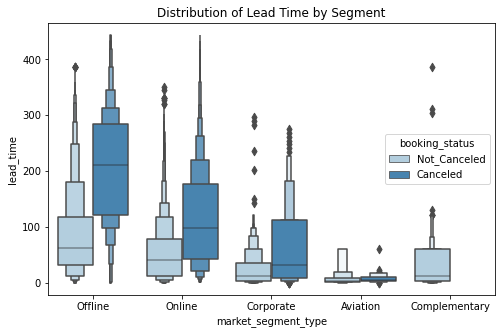

In [23]:
# This graph shows the wider disparity in prices ... likely one explanation is people are shopping for better prices which may explain why the range is higher for most of the market segements, except aviation.

plt.figure(figsize=(8,5))
sns.boxenplot(x='market_segment_type', y='lead_time', data=data, palette='Blues', hue='booking_status')
plt.title("Distribution of Lead Time by Segment")

Text(0.5, 1.0, 'Violin Plot of Avg Price Segment, Separated by Booking Status')

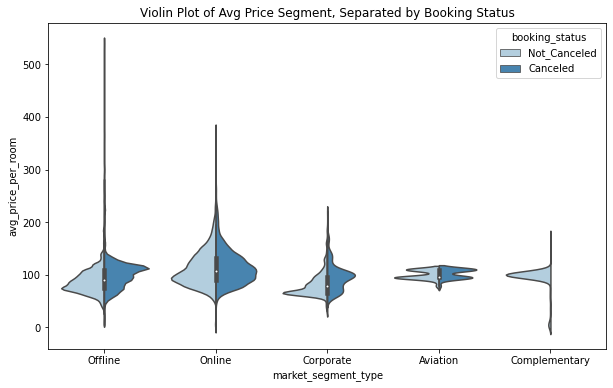

In [24]:
# A similar, but different picture of the sysmetry of pricing or lack of symteric results e.g. Offline cancellations tend to be lower in price than the canceled ones.


plt.figure(figsize=(10,6))
sns.violinplot(x='market_segment_type', y='avg_price_per_room', data=data, hue='booking_status', split=True,palette='Blues')
plt.title("Violin Plot of Avg Price Segment, Separated by Booking Status")

Text(0.5, 1.0, 'Violin Plot of Segment by Lead Time, Separated by Booking Status')

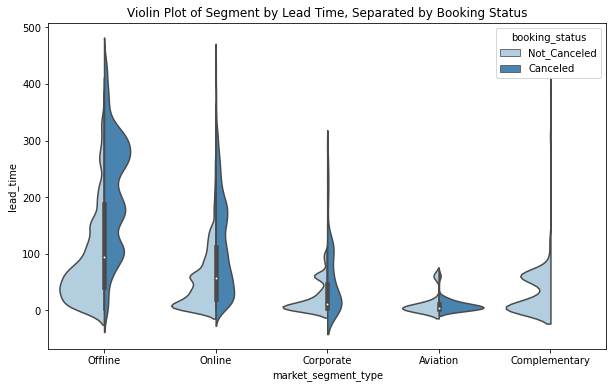

In [25]:
# This shows the very uneven distrabution around how far in adavance people book there reservations by channel...e.g offline tends to book way out compared to the opposite side of Avaition which is a very small lead time.


plt.figure(figsize=(10,6))
sns.violinplot(x='market_segment_type', y='lead_time', data=data, hue='booking_status', split=True,palette='Blues')
plt.title("Violin Plot of Segment by Lead Time, Separated by Booking Status")

Text(0.5, 1.0, 'Count of Reservations, Separated by Booking Status')

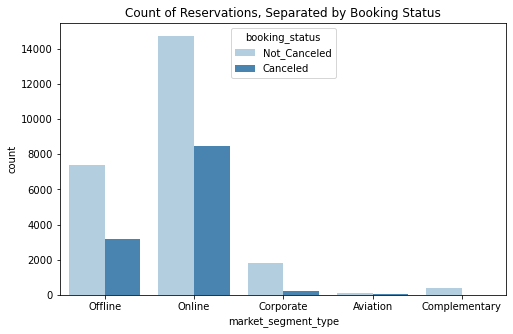

In [26]:
# This graph shows cancelation rates via channel ... clearly online it's easier to cancel which drives the number.
plt.figure(figsize=(8,5))

sns.countplot(x='market_segment_type',data=data, palette='Blues',hue='booking_status')

plt.title("Count of Reservations, Separated by Booking Status")

Text(0.5, 1.0, 'Avg Price by Segment')

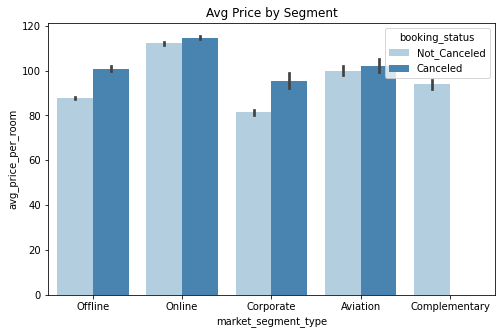

In [27]:
# For the ease of booking and canceling ... Online users typically pay more per reservation and have the highest cancelation rate.

plt.figure(figsize=(8,5))
sns.barplot(x='market_segment_type',y='avg_price_per_room',data=data, palette='Blues',hue='booking_status')

plt.title("Avg Price by Segment")

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

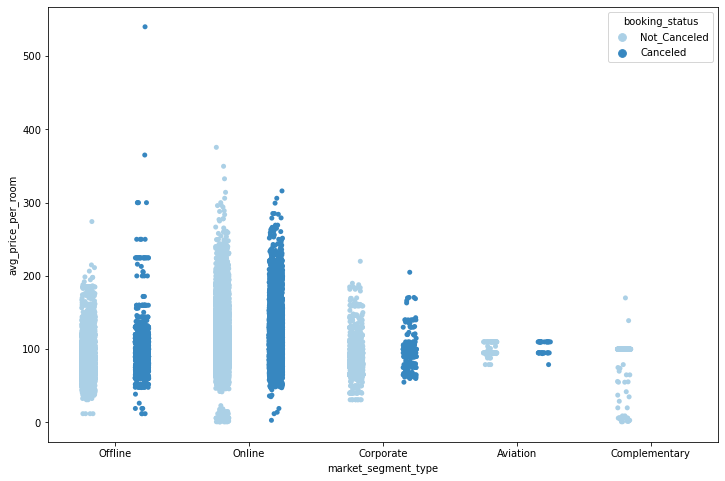

In [28]:
# Same story as above ... just a new cool graph!!!

plt.figure(figsize=(12,8))
sns.stripplot(x='market_segment_type',y='avg_price_per_room', data=data, jitter=True, hue='booking_status', dodge=True, palette='Blues')

<AxesSubplot:title={'center':'Average Room Price by Month'}, xlabel='month', ylabel='avg_price_per_room'>

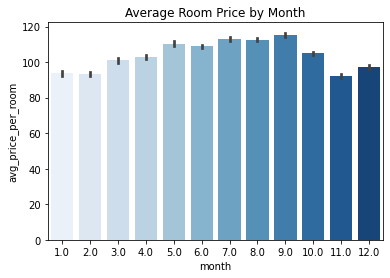

In [29]:
# This graph shows prices start low in January and gradully climb to peak in July-September and then declines each month thereafter.


#create bar plot for average temps by month
plt.title('Average Room Price by Month')
sns.barplot(x='month', y='avg_price_per_room', data=data, palette='Blues')

Text(0.5, 1.0, 'Simple Grouped Barplot')

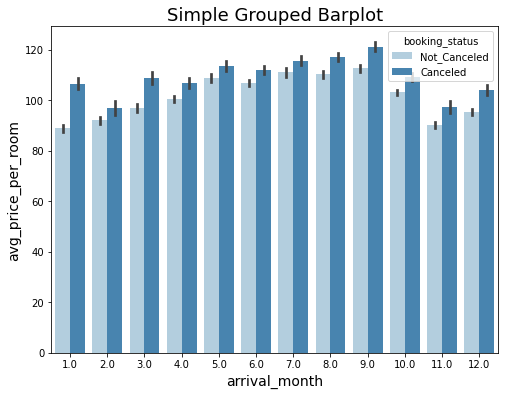

In [30]:
# Same as above, but another new graph type!!!


# code to plot a simple grouped barplot
plt.figure(figsize=(8, 6))
sns.barplot(
    x="month",
    y="avg_price_per_room",
    hue="booking_status",
    data=data,
    palette="Blues",
)

plt.ylabel("avg_price_per_room", size=14)
plt.xlabel("arrival_month", size=14)
plt.title("Simple Grouped Barplot", size=18)

<AxesSubplot:xlabel='month'>

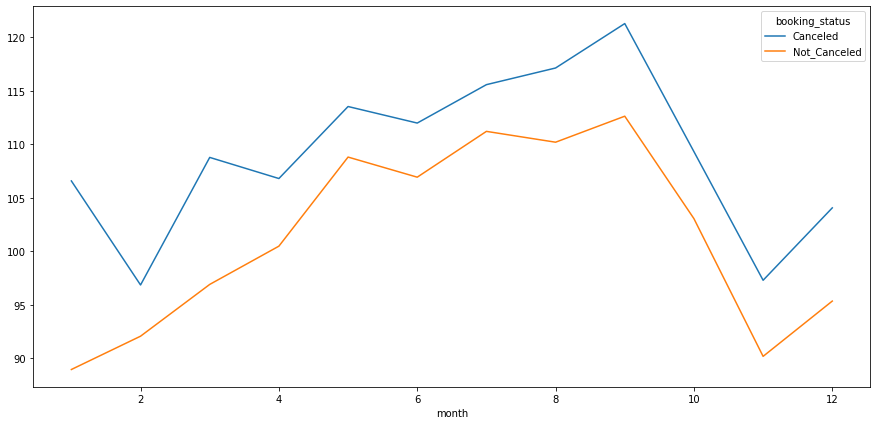

In [31]:
# I like these! This graph shows the same as above but i think is easier to understand the relationship between avg price, month and cancelation status.

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
data.groupby(['month','booking_status']).mean()['avg_price_per_room'].unstack().plot(ax=ax)

<AxesSubplot:xlabel='lead_time'>

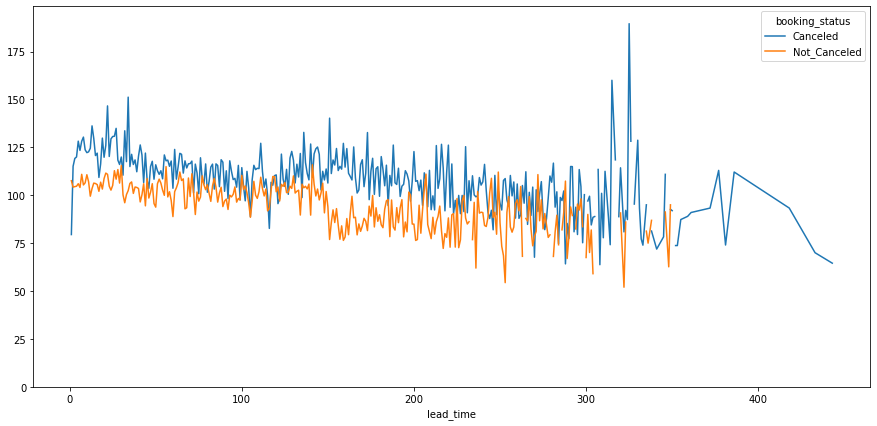

In [32]:
# Although not perfect...there are some genral relationship between lead time and avg price.

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
data.groupby(['lead_time','booking_status']).mean()['avg_price_per_room'].unstack().plot(ax=ax)

<AxesSubplot:xlabel='room_type_reserved'>

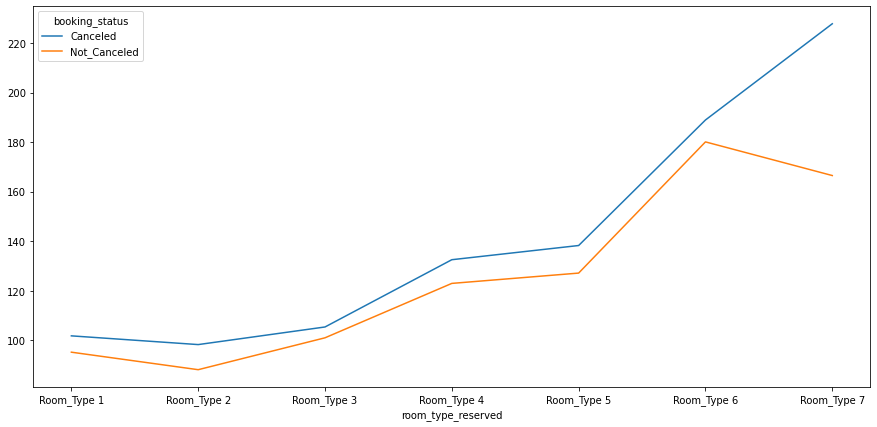

In [33]:
# Again this is simple to understand, cancel or not, by room type ... we don't know what the type is as its provied to us by the compnay. But let's assume the higher the type #, the better the room is (and higher price) which tend to get canceled more than super budget rooms.

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
data.groupby(['room_type_reserved','booking_status']).mean()['avg_price_per_room'].unstack().plot(ax=ax)

<AxesSubplot:xlabel='type_of_meal_plan'>

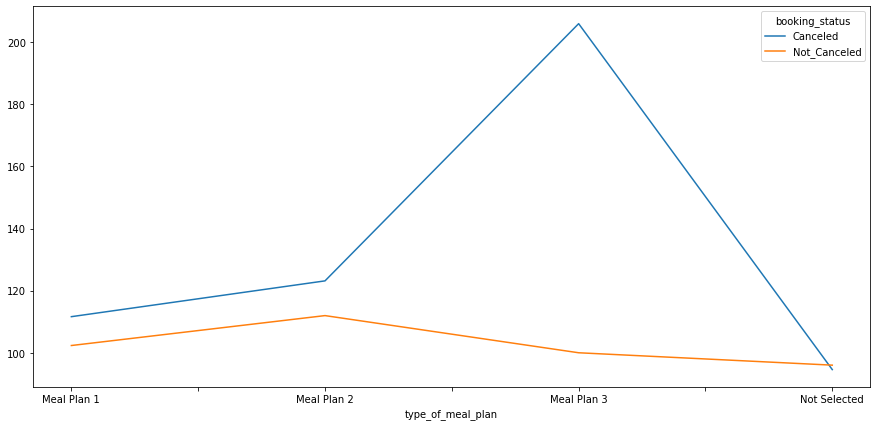

In [34]:
# This shows a very big difference in canceled rooms for people that select Meal Plan 3 – Full board (breakfast, lunch, and dinner)...that is likely a factor in the higher avg price.

# plot data
fig, ax = plt.subplots(figsize=(15, 7))
# use unstack()
data.groupby(["type_of_meal_plan", "booking_status"]).mean()[
    "avg_price_per_room"
].unstack().plot(ax=ax)

array([<AxesSubplot:title={'center':'Canceled'}>,
       <AxesSubplot:title={'center':'Not_Canceled'}>], dtype=object)

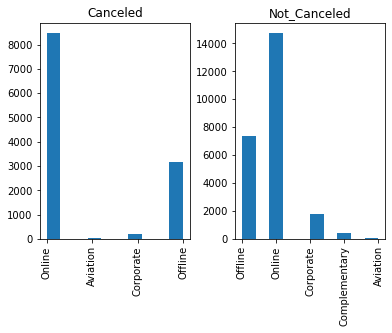

In [35]:
#This confirms what we have seen ... Online is easy to book and cancel.

data.market_segment_type.hist(by=data.booking_status)

array([<AxesSubplot:title={'center':'Canceled'}>,
       <AxesSubplot:title={'center':'Not_Canceled'}>], dtype=object)

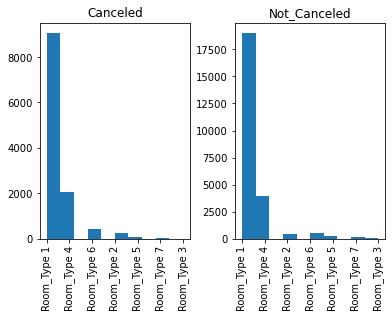

In [36]:
# Room type 1 has the largest cancelation rate.

data.room_type_reserved.hist(by=data.booking_status)

array([<AxesSubplot:title={'center':'Canceled'}>,
       <AxesSubplot:title={'center':'Not_Canceled'}>], dtype=object)

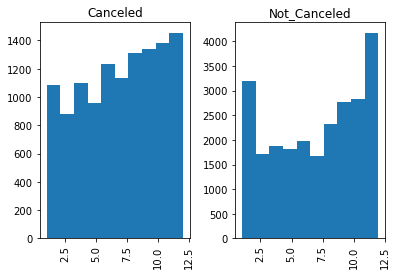

In [37]:
# Same story ... cancelations rise throughout the months, and start off very low in Jan when people dont travel.

data.month.hist(by=data.booking_status)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel? October
2. Which market segment do most of the guests come from? Online
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments? Corp pays the least and Online the most = Aviation - 100.704000, Comp - 93.678849 	Corp - 82.911740 	Offline - 91.632679 	Online - 113.079634
4. What percentage of bookings are canceled? Number of canceled reservations: 11878 (32.78%)
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel? 15 / 926 = ~2%
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation? Yes

In [38]:
data.groupby(["month"]).size().reset_index(name='counts')

month  counts
0    1.00    1831
1    2.00    2445
2    3.00    2595
3    4.00    2982
4    5.00    2778
5    6.00    3209
6    7.00    2811
7    8.00    3631
8    9.00    4116
9   10.00    4209
10  11.00    2655
11  12.00    2976

In [39]:
data.groupby(["market_segment_type"]).size().reset_index(name='counts')

market_segment_type  counts
0            Aviation     125
1       Complementary     390
2           Corporate    2011
3             Offline   10518
4              Online   23194

In [40]:
data.groupby(["repeated_guest"]).size().reset_index(name='counts')

repeated_guest  counts
0               0   35312
1               1     926

In [41]:
pd.pivot_table(data, columns=['market_segment_type'], aggfunc='mean').style

In [42]:
pd.pivot_table(data, columns=['repeated_guest', 'booking_status'], aggfunc='size').to_frame(name='value').style


In [43]:
# populate the list of numeric attributes and categorical attributes
num_list = []
cat_list = []

for column in data:
    if is_numeric_dtype(data[column]):
        num_list.append(column)
    elif is_string_dtype(data[column]):
        cat_list.append(column)

print(num_list)
print(cat_list)


['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'month', 'week_of_year']
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


## Univariate analysis

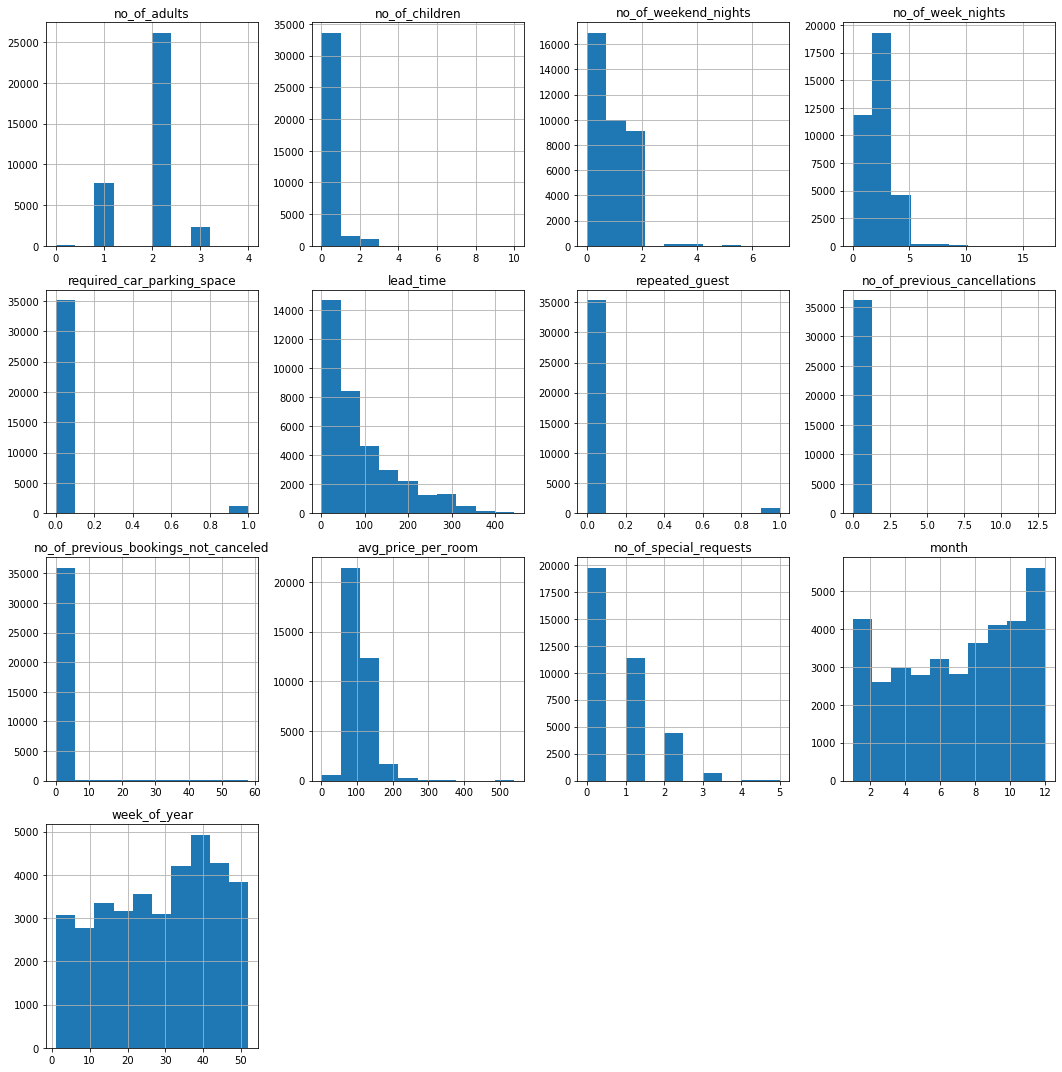

In [44]:
data[num_list].hist(figsize=(15, 15))
# set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

In [45]:
# There are several variables that are skewed - no of weekend nights, lead time, # of special requests that may need to be treated as outliers.

In [46]:
# this is a great def function for creating combined box plots and historgrams for the numerical values.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [47]:
# Lets check which variables are numeric and which ones are categorical.
# There are float64(3), int64(9), object(4) 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   type_of_meal_plan                     36238 non-null  object 
 5   required_car_parking_space            36238 non-null  int64  
 6   room_type_reserved                    36238 non-null  object 
 7   lead_time                             36238 non-null  float64
 8   market_segment_type                   36238 non-null  object 
 9   repeated_guest                        36238 non-null  int64  
 10  no_of_previous_cancellations          36238 non-null  int64  
 11  no_of_previous_

In [48]:
import seaborn as sns
sns.__version__

'0.11.2'

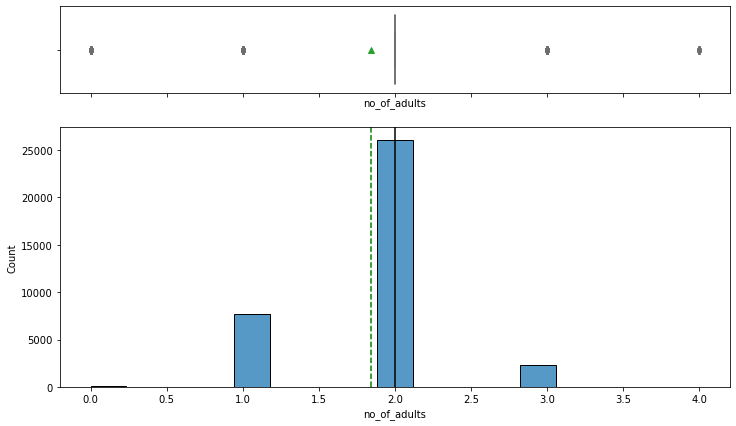

In [49]:
histogram_boxplot(data, "no_of_adults")

There are 2 adults on avg for each reservations.

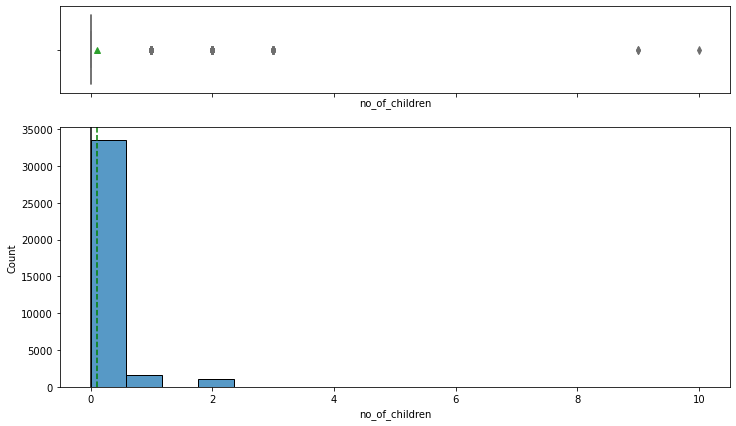

In [50]:
histogram_boxplot(data, "no_of_children")

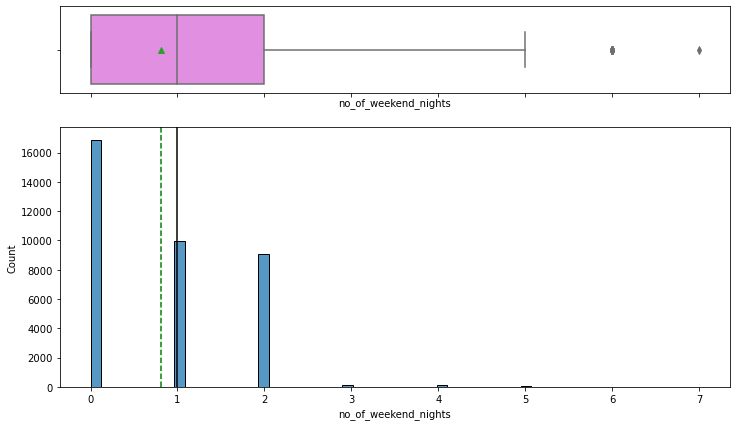

In [51]:
histogram_boxplot(data, "no_of_weekend_nights")

- Most reservations are during the week.

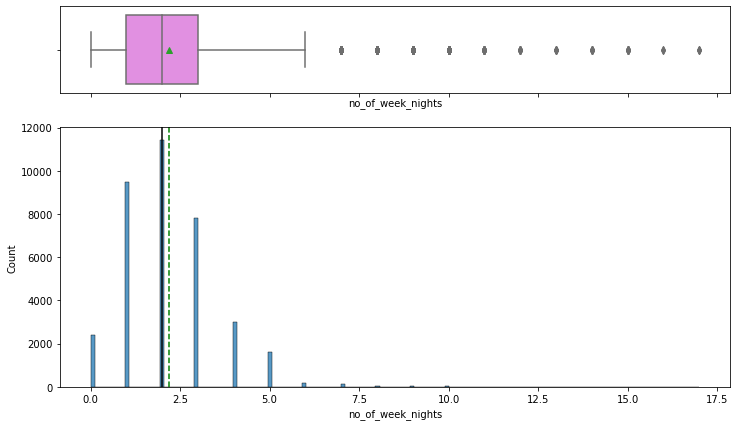

In [52]:
histogram_boxplot(data, "no_of_week_nights")

- Most reservations durning the week are for < 2.5 nights.

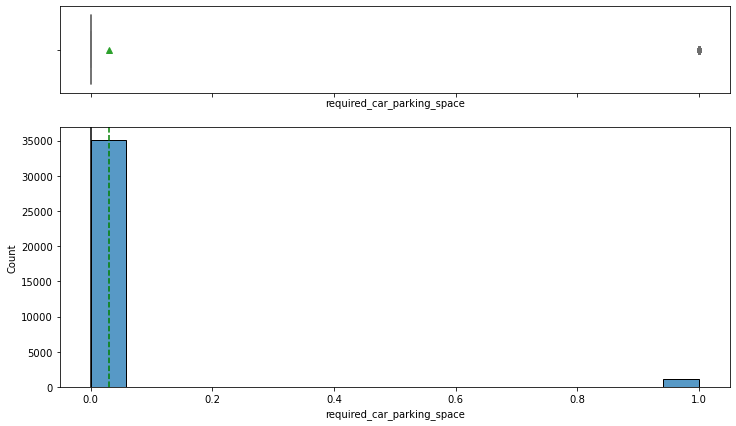

In [53]:
histogram_boxplot(data, "required_car_parking_space")

- Most reservations do not include parking.

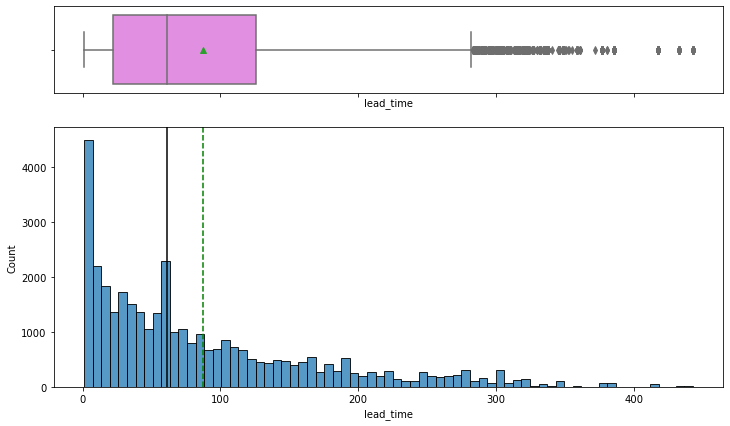

In [54]:
histogram_boxplot(data, "lead_time")

Most reservations get book < 100 days out, however there are quite a few that go out >200+

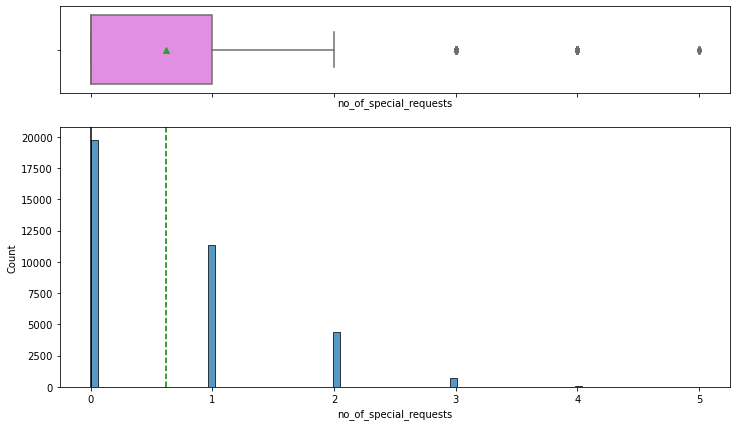

In [55]:
histogram_boxplot(data, "no_of_special_requests")

Many reservations include 1 special request.

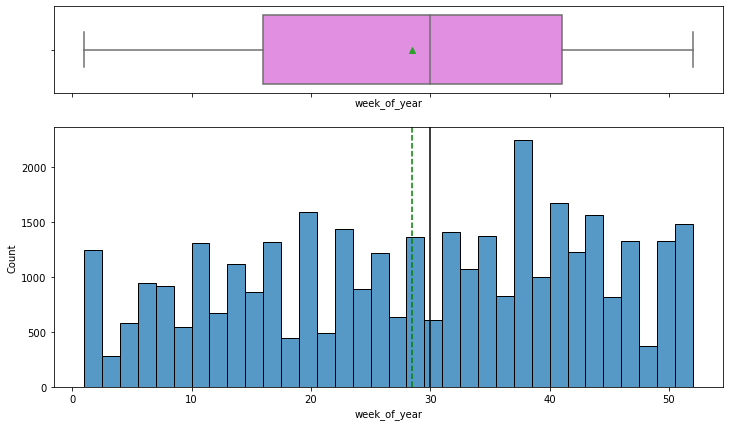

In [56]:
histogram_boxplot(data, "week_of_year")

- Starting in summer based on the # of week of the year, through the fall are the busiest weeks.

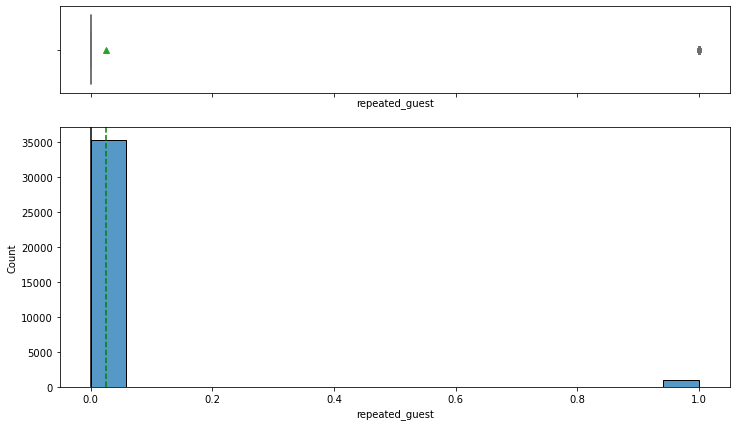

In [57]:
histogram_boxplot(data, "repeated_guest")

Most reservations are not repeat customers.

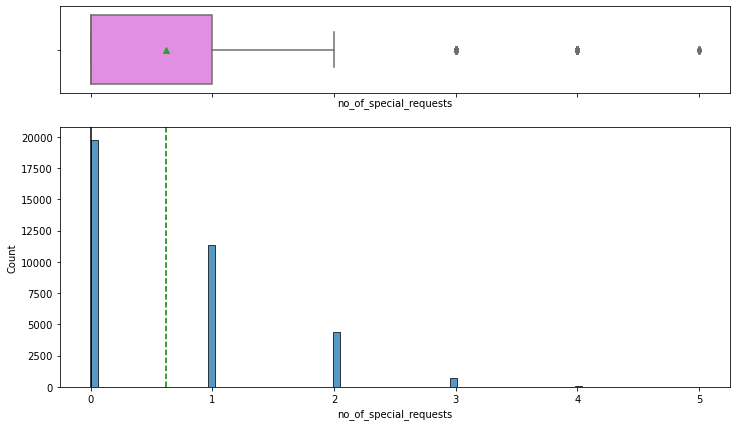

In [58]:
histogram_boxplot(data, "no_of_special_requests")

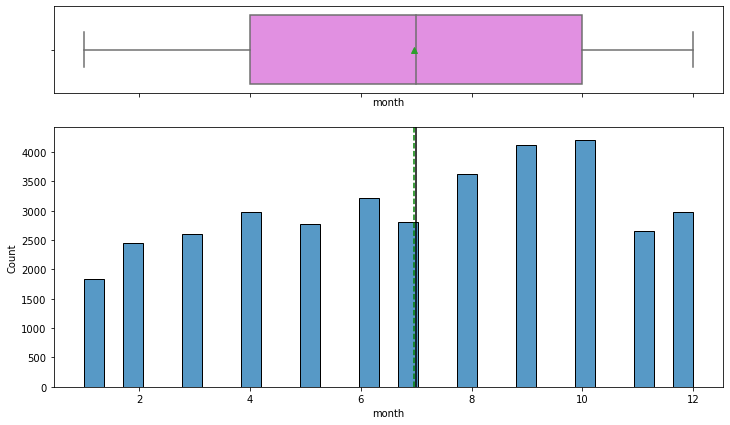

In [59]:
histogram_boxplot(data, "month")

Starting in August....the hotels are busy. October os the highest volume month.

Most reservations do not have any special requests.

In [60]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(ascending = True),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

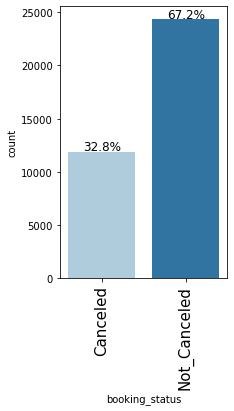

In [61]:
labeled_barplot(data, "booking_status", perc=True)

67% of reservations are not canceled.

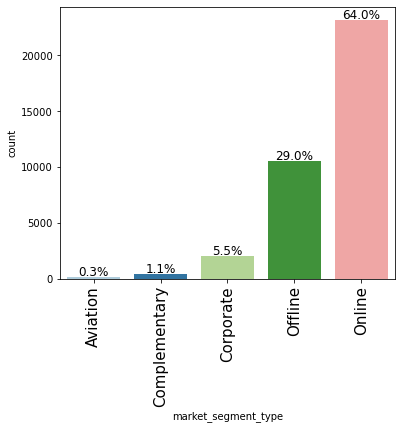

In [62]:
labeled_barplot(data, "market_segment_type", perc=True)

! 2/3rds of all reservations are no made Online

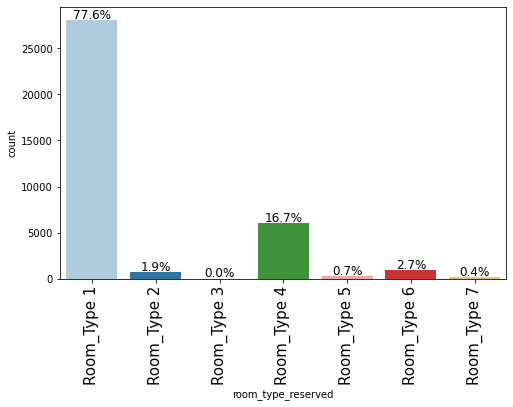

In [63]:
labeled_barplot(data, "room_type_reserved", perc=True)

- We don't have a translation key for this varibale as it was provide, but likely refers to a class of room. Most of which are Type 1
- This varibale doesnt tell us very much without a 'key'

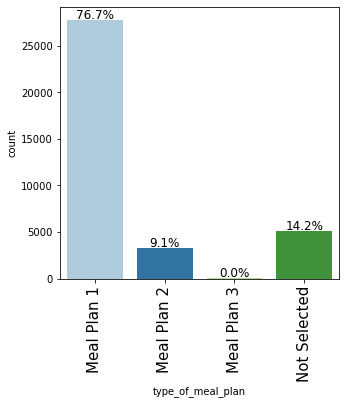

In [64]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

Most people eat the most important meal of the day, breakfast and have it including in there reservation.

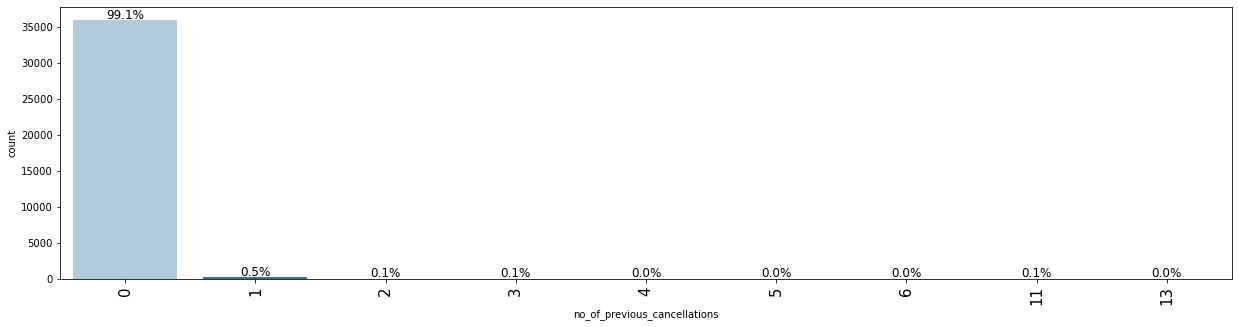

In [65]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True, n=20)

99% of all reservations, the person making the reservation has not canceled in the past.

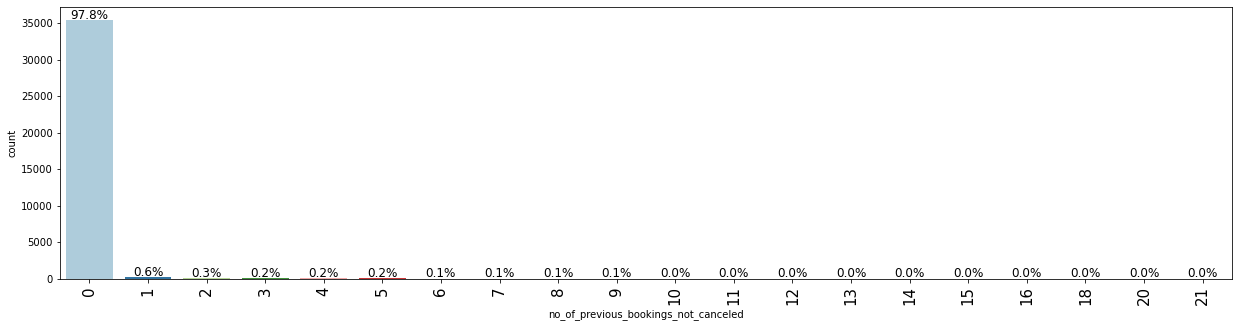

In [66]:
labeled_barplot(data, "no_of_previous_bookings_not_canceled", perc=True, n=20)

- Almost the same, 98% of all reservations, the person making the reservation has not canceled in the past.

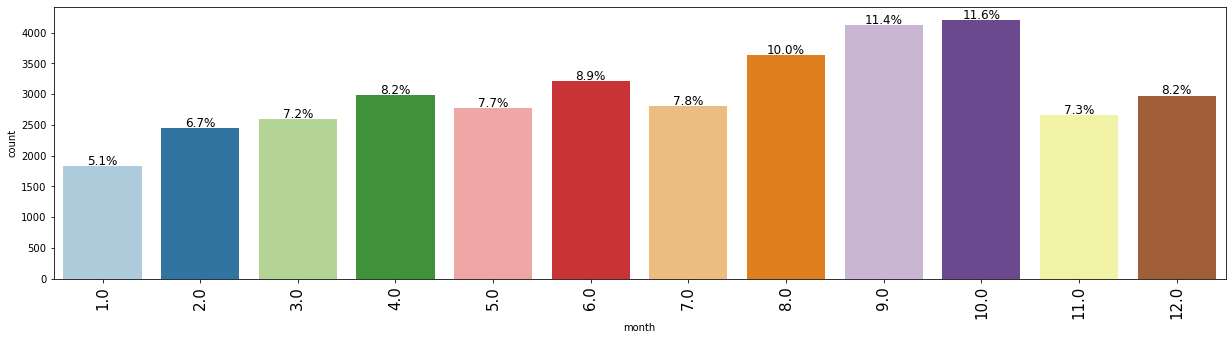

In [67]:
labeled_barplot(data, "month", perc=True, n=20)

In [68]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

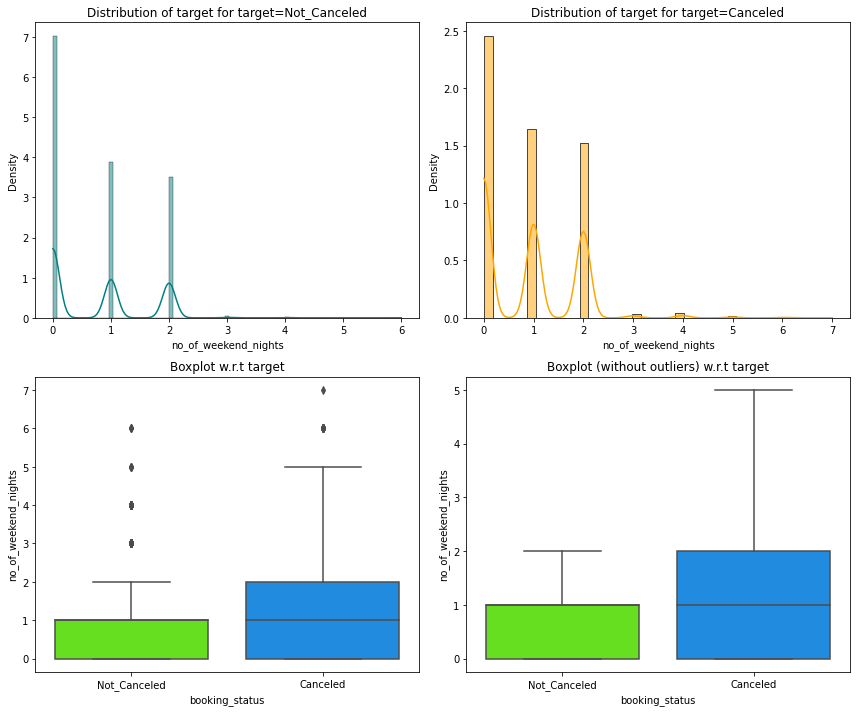

In [69]:
distribution_plot_wrt_target(data, "no_of_weekend_nights", "booking_status")

There are a higher # of weekend night reservations that do get canceled.


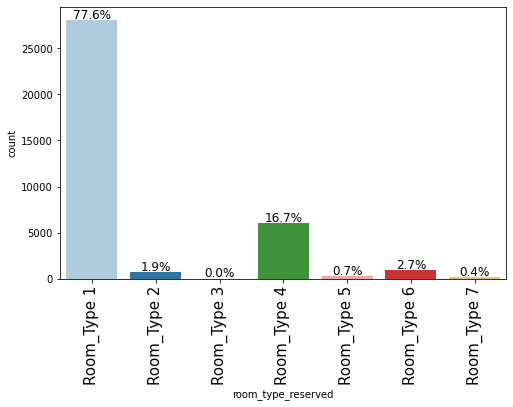

In [70]:
labeled_barplot(data, "room_type_reserved", perc=True)

In [71]:
#Room Type 1 gets most often selected as seen above. It appears the cancele/not cancel is the same.

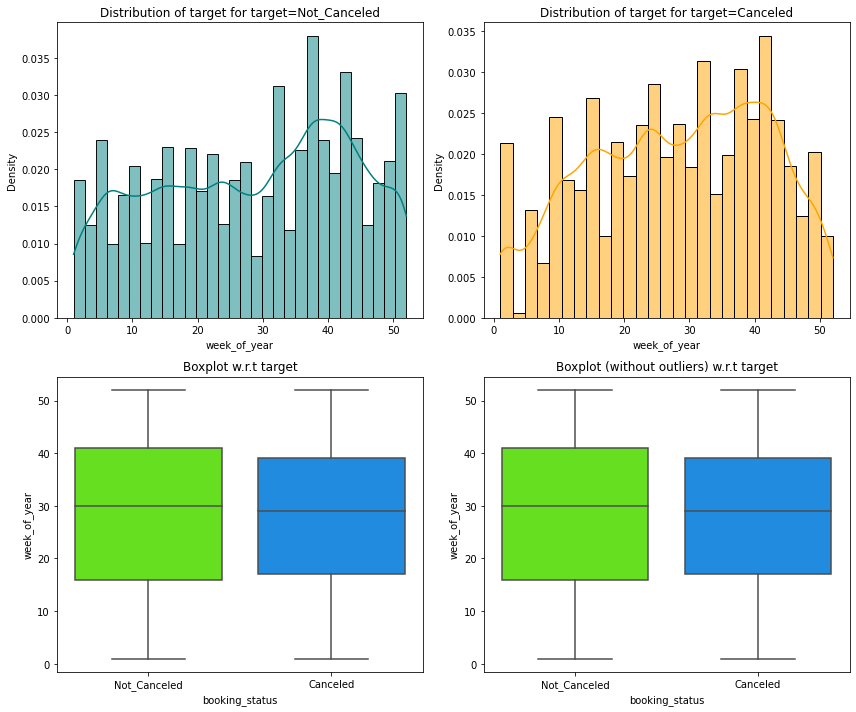

In [72]:
distribution_plot_wrt_target(data, "week_of_year", "booking_status")

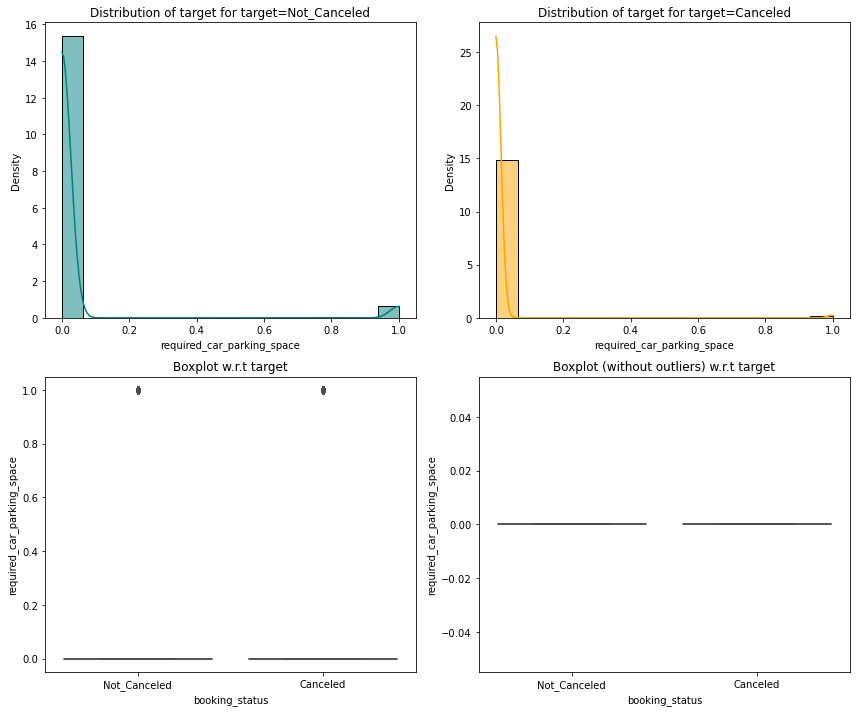

In [73]:
distribution_plot_wrt_target(data, "required_car_parking_space", "booking_status")

Reservations that dont require a parking spot get canceled more. This may indicate people plan more for the time to drive and are less likely to cancel.

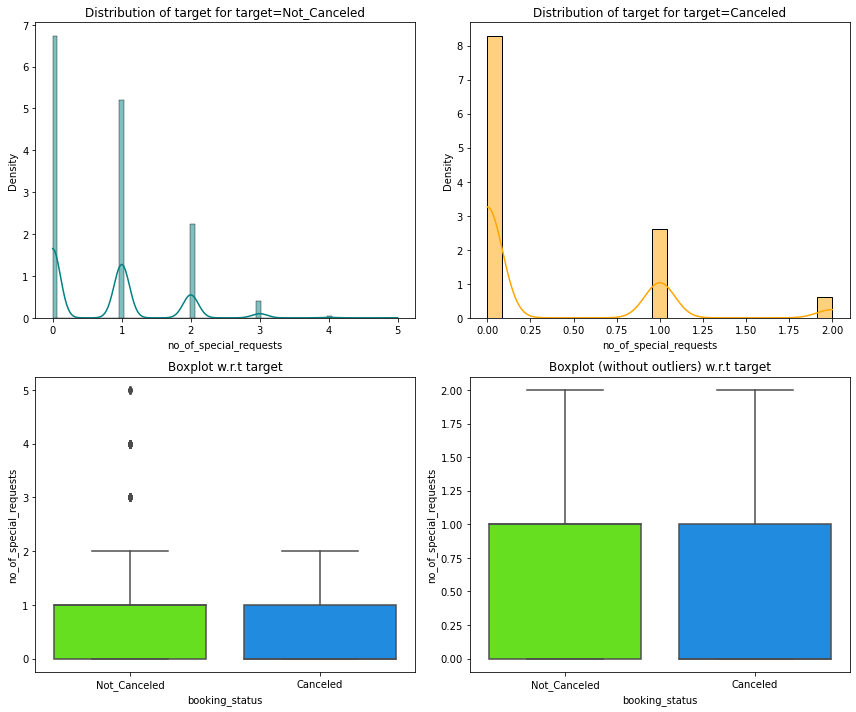

In [74]:
distribution_plot_wrt_target(data, "no_of_special_requests", "booking_status")

Canceled reservations have fewer special requests that not canceld ... may show some adavabnce thought of planning.

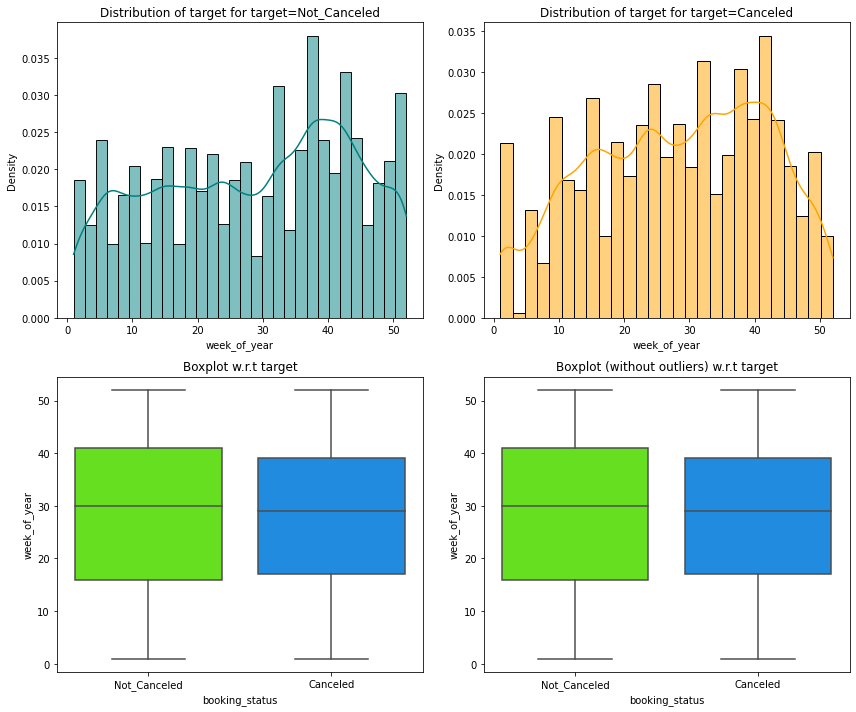

In [75]:
distribution_plot_wrt_target(data, "week_of_year", "booking_status")

As the weeks progress the higher the cancelation rate is...especially around week 40.

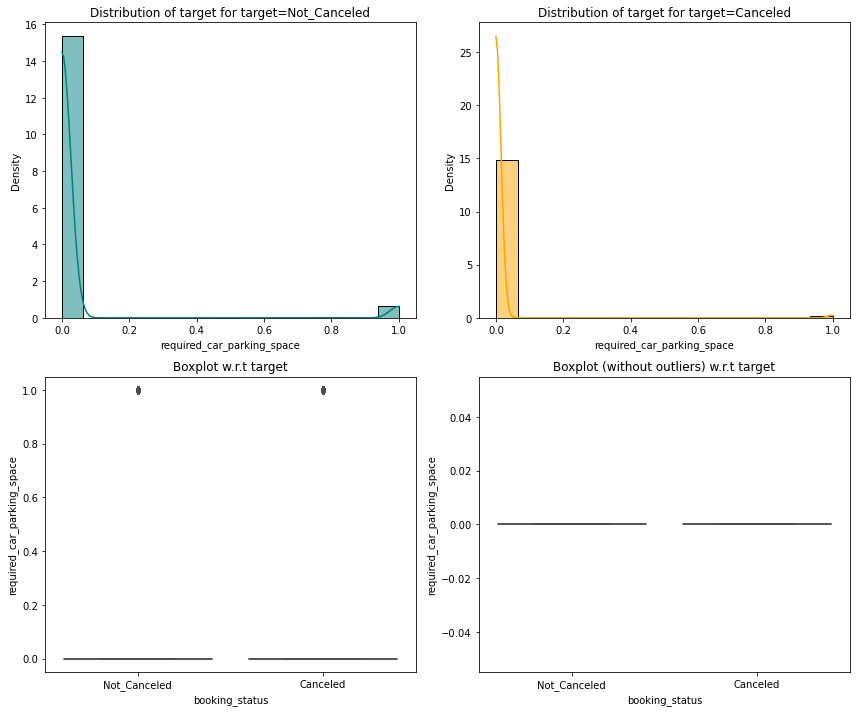

In [76]:
distribution_plot_wrt_target(data, "required_car_parking_space", "booking_status")

Reservations that do not require parkeing get canceled more than those that do.

In [77]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11878         24360  36238
Meal Plan 1            8673         19129  27802
Not Selected           1698          3431   5129
Meal Plan 2            1506          1796   3302
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


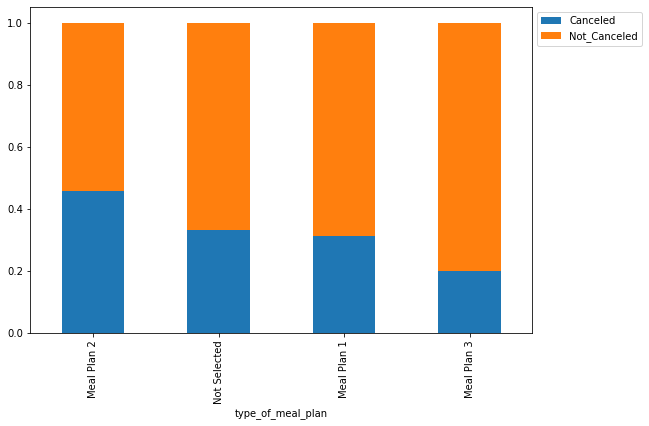

In [78]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

- Meal plan 2 has the highes cancelation rate

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11878         24360  36238
Room_Type 1             9066         19039  28105
Room_Type 4             2068          3981   6049
Room_Type 6              406           558    964
Room_Type 2              228           464    692
Room_Type 5               72           191    263
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


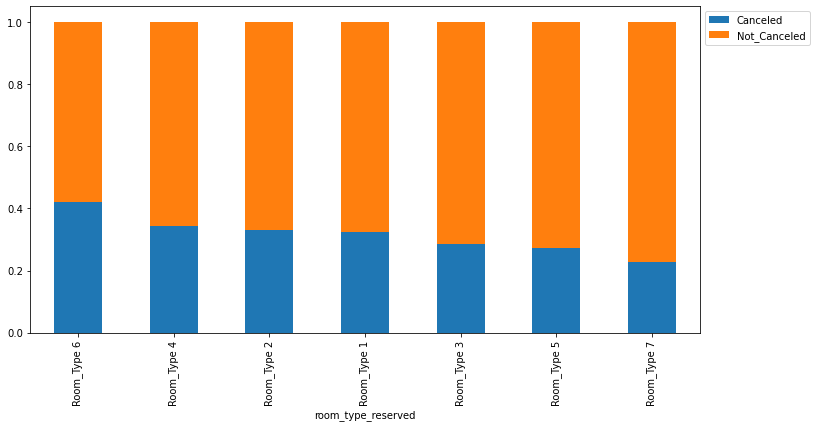

In [79]:
stacked_barplot(data, "room_type_reserved", "booking_status")

Room Type 6 has the highest cancelation rate.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11878         24360  36238
Online                   8469         14725  23194
Offline                  3152          7366  10518
Corporate                 220          1791   2011
Aviation                   37            88    125
Complementary               0           390    390
------------------------------------------------------------------------------------------------------------------------


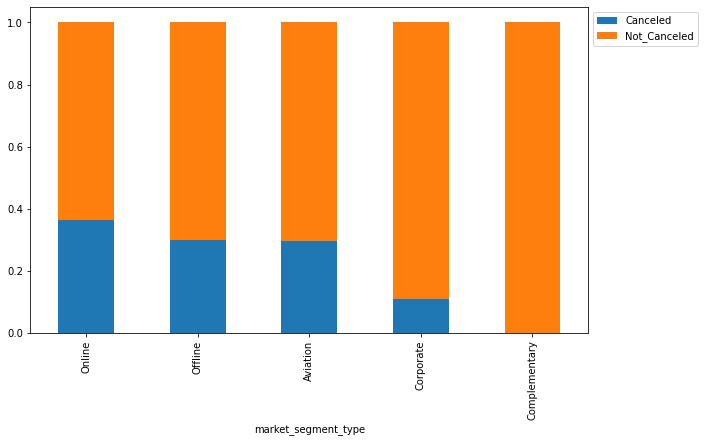

In [80]:
stacked_barplot(data, "market_segment_type", "booking_status")

Online resrvations get canceld most frequent ... followed by Offline and Aviation which are about equal.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11878         24360  36238
0                           8540         11211  19751
1                           2701          8662  11363
2                            637          3726   4363
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


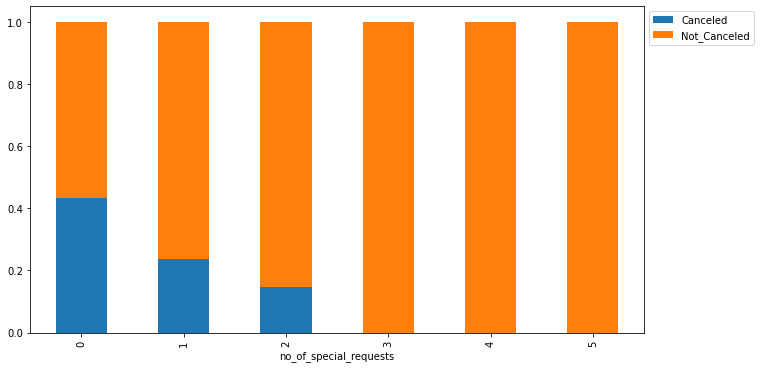

In [81]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

Reservations that have no special request get canceled at almost 2x the rate of all other types.

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11878         24360  36238
0                                11863         24038  35901
1                                   10           187    197
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


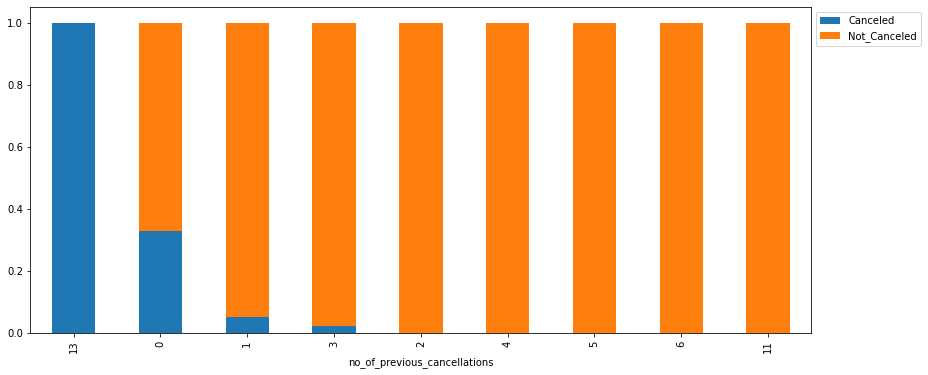

In [82]:
stacked_barplot(data, "no_of_previous_cancellations", "booking_status")

Poeple that have 13 prior cancelation will cancel, followed by ~35% of all reswervations with no idication will get canceled.

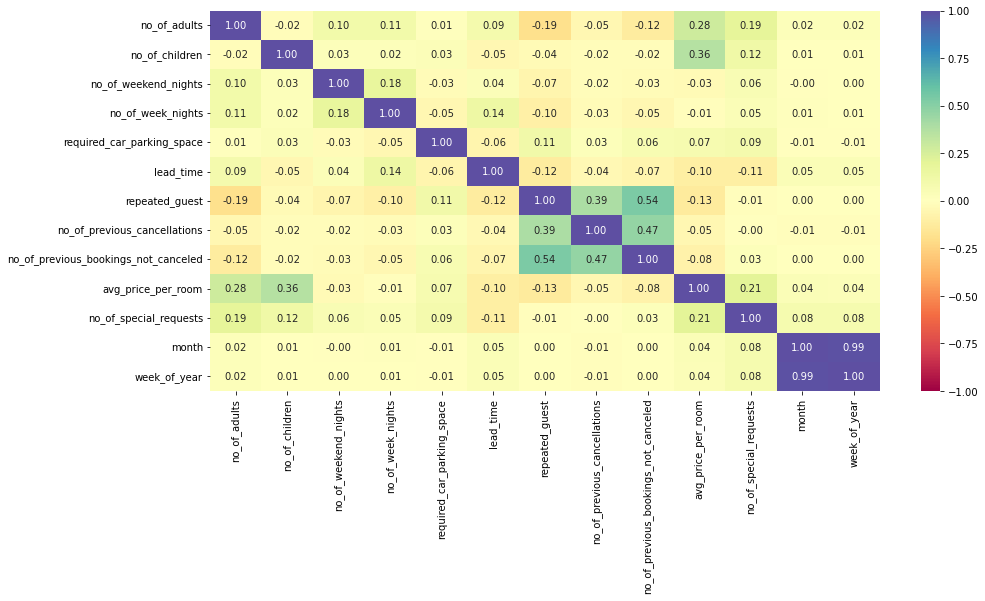

In [83]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Another view of the prior matrix with a different color scheme to highlight the variables that are correlated.

NOTE: WE WILL HAVE TO DROP EITHER MONTH OR WEEK BC THE ARE ~PERFECTLY CORRELATED

## Data Preprocessing 1 - Basic Cleaning After Initial data Inspection

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   type_of_meal_plan                     36238 non-null  object 
 5   required_car_parking_space            36238 non-null  int64  
 6   room_type_reserved                    36238 non-null  object 
 7   lead_time                             36238 non-null  float64
 8   market_segment_type                   36238 non-null  object 
 9   repeated_guest                        36238 non-null  int64  
 10  no_of_previous_cancellations          36238 non-null  int64  
 11  no_of_previous_

In [85]:
# populate the list of numeric attributes and categorical attributes
num_list = []
cat_list = []

for column in data:
    if is_numeric_dtype(data[column]):
        num_list.append(column)
    elif is_string_dtype(data[column]):
        cat_list.append(column)

print(num_list)
print(cat_list)


['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'month', 'week_of_year']
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   type_of_meal_plan                     36238 non-null  object 
 5   required_car_parking_space            36238 non-null  int64  
 6   room_type_reserved                    36238 non-null  object 
 7   lead_time                             36238 non-null  float64
 8   market_segment_type                   36238 non-null  object 
 9   repeated_guest                        36238 non-null  int64  
 10  no_of_previous_cancellations          36238 non-null  int64  
 11  no_of_previous_

## EDA Post Data Processing First Pass

- It is a good idea to explore the data once again after manipulating it.

In [87]:
data.describe().T

count   mean   std  min   25%    50%  \
no_of_adults                         36238.00   1.85  0.52 0.00  2.00   2.00   
no_of_children                       36238.00   0.11  0.40 0.00  0.00   0.00   
no_of_weekend_nights                 36238.00   0.81  0.87 0.00  0.00   1.00   
no_of_week_nights                    36238.00   2.20  1.41 0.00  1.00   2.00   
required_car_parking_space           36238.00   0.03  0.17 0.00  0.00   0.00   
lead_time                            36238.00  87.45 84.52 1.00 22.00  61.00   
repeated_guest                       36238.00   0.03  0.16 0.00  0.00   0.00   
no_of_previous_cancellations         36238.00   0.02  0.37 0.00  0.00   0.00   
no_of_previous_bookings_not_canceled 36238.00   0.15  1.75 0.00  0.00   0.00   
avg_price_per_room                   36238.00 104.94 32.68 0.50 81.00 100.00   
no_of_special_requests               36238.00   0.62  0.79 0.00  0.00   0.00   
month                                36238.00   6.96  3.26 1.00  4.00   7.00   
week_of_year                         36238.00  28.43 14.33 1.00 16.00  30.00   

                                        75%    max  
no_of_adults                           2.00   4.00  
no_of_children                         0.00  10.00  
no_of_weekend_nights                   2.00   7.00  
no_of_week_nights                      3.00  17.00  
required_car_parking_space             0.00   1.00  
lead_time                            126.00 443.00  
repeated_guest                         0.00   1.00  
no_of_previous_cancellations           0.00  13.00  
no_of_previous_bookings_not_canceled   0.00  58.00  
avg_price_per_room                   120.00 540.00  
no_of_special_requests                 1.00   5.00  
month                                 10.00  12.00  
week_of_year                          41.00  52.00

- As mentioned earlier, the class distribution in the target variable is imbalanced.
- We have 70% observations for non-defaulters and 30% observations for defaulters.

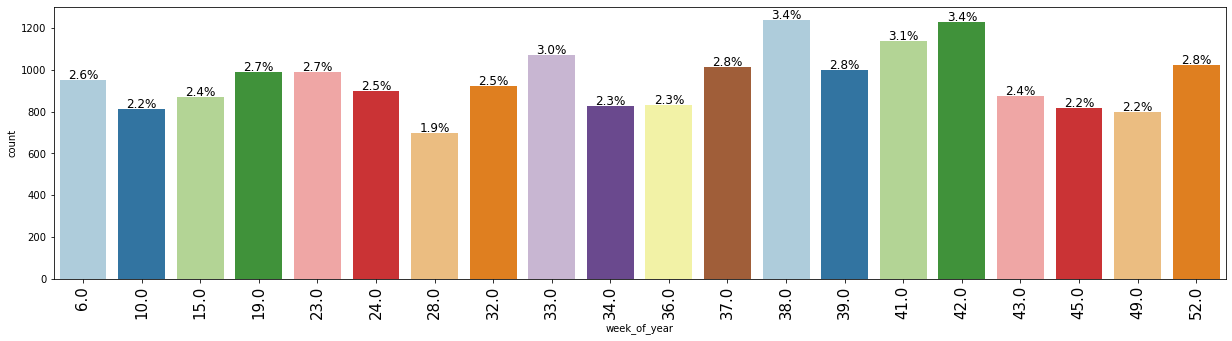

In [88]:
labeled_barplot(data, "week_of_year", perc=True, n=20)

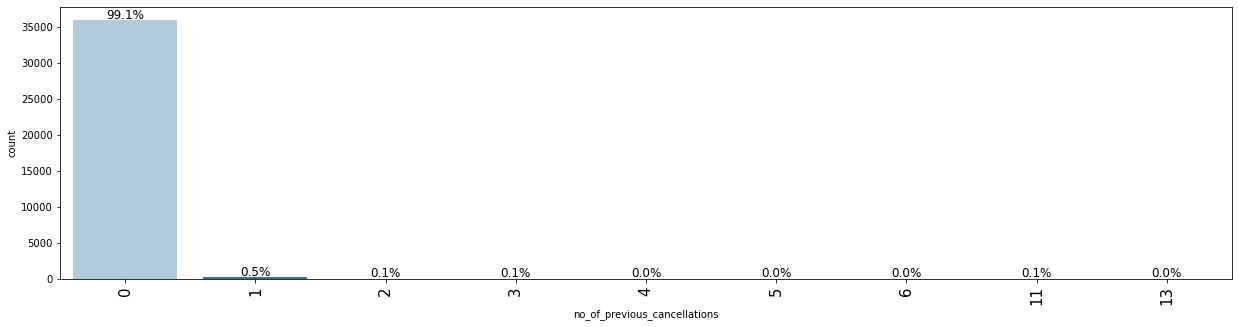

In [89]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True, n=20)

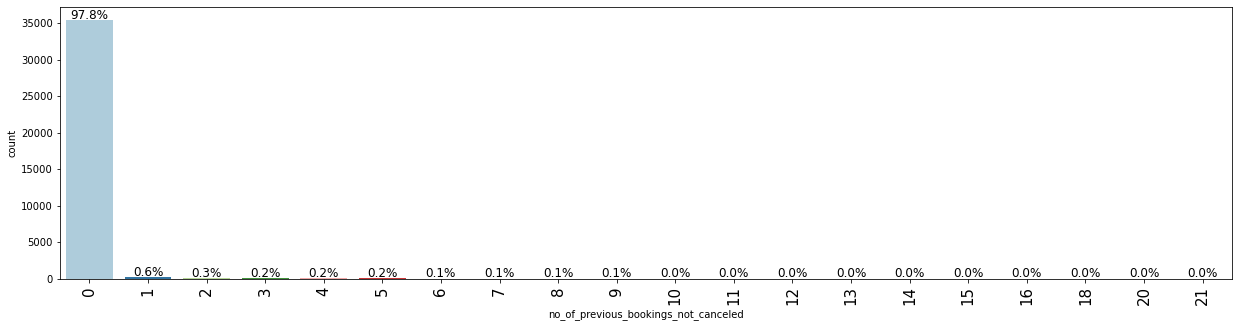

In [90]:
labeled_barplot(data, "no_of_previous_bookings_not_canceled", perc=True, n=20)

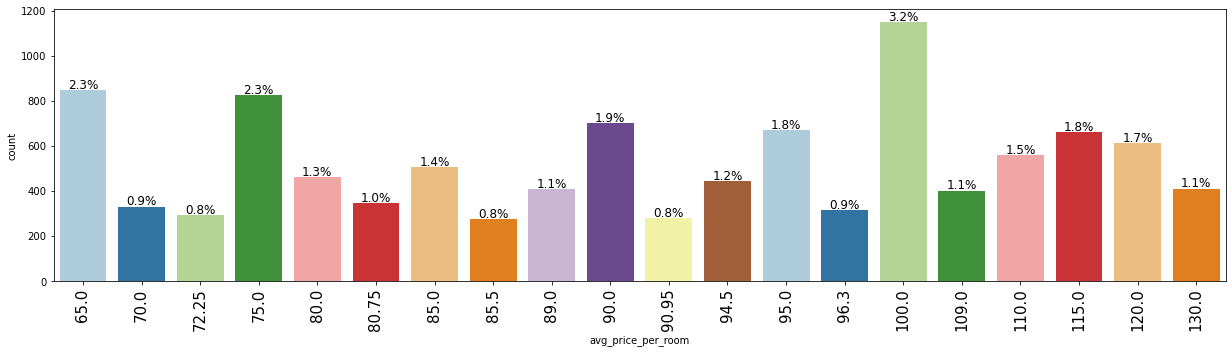

In [91]:
labeled_barplot(data, "avg_price_per_room", perc=True, n=20)

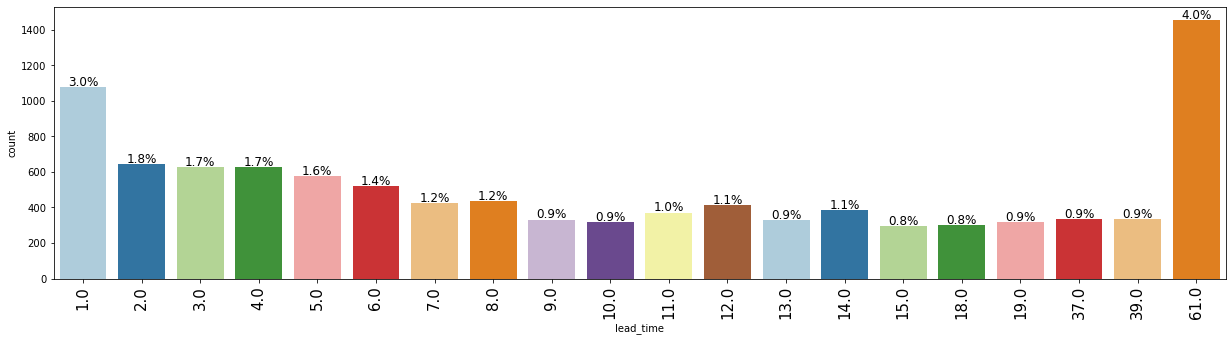

In [92]:
labeled_barplot(data, "lead_time", perc=True, n=20, )

- Majority of the customers i.e. 63% fall into the skilled category.
- There are only approx 15% customers that lie in highly skilled category which makes sense as these may be the persons with high education or highly experienced.
- There are very few observations, approx 22%, with 0 or 1 job category.

- The plot shows that most customers take credit for luxury items like car, radio or furniture/equipment, domestic appliances.
- Approximately just 16% customers take credit for business or education

## Bivariate Analysis

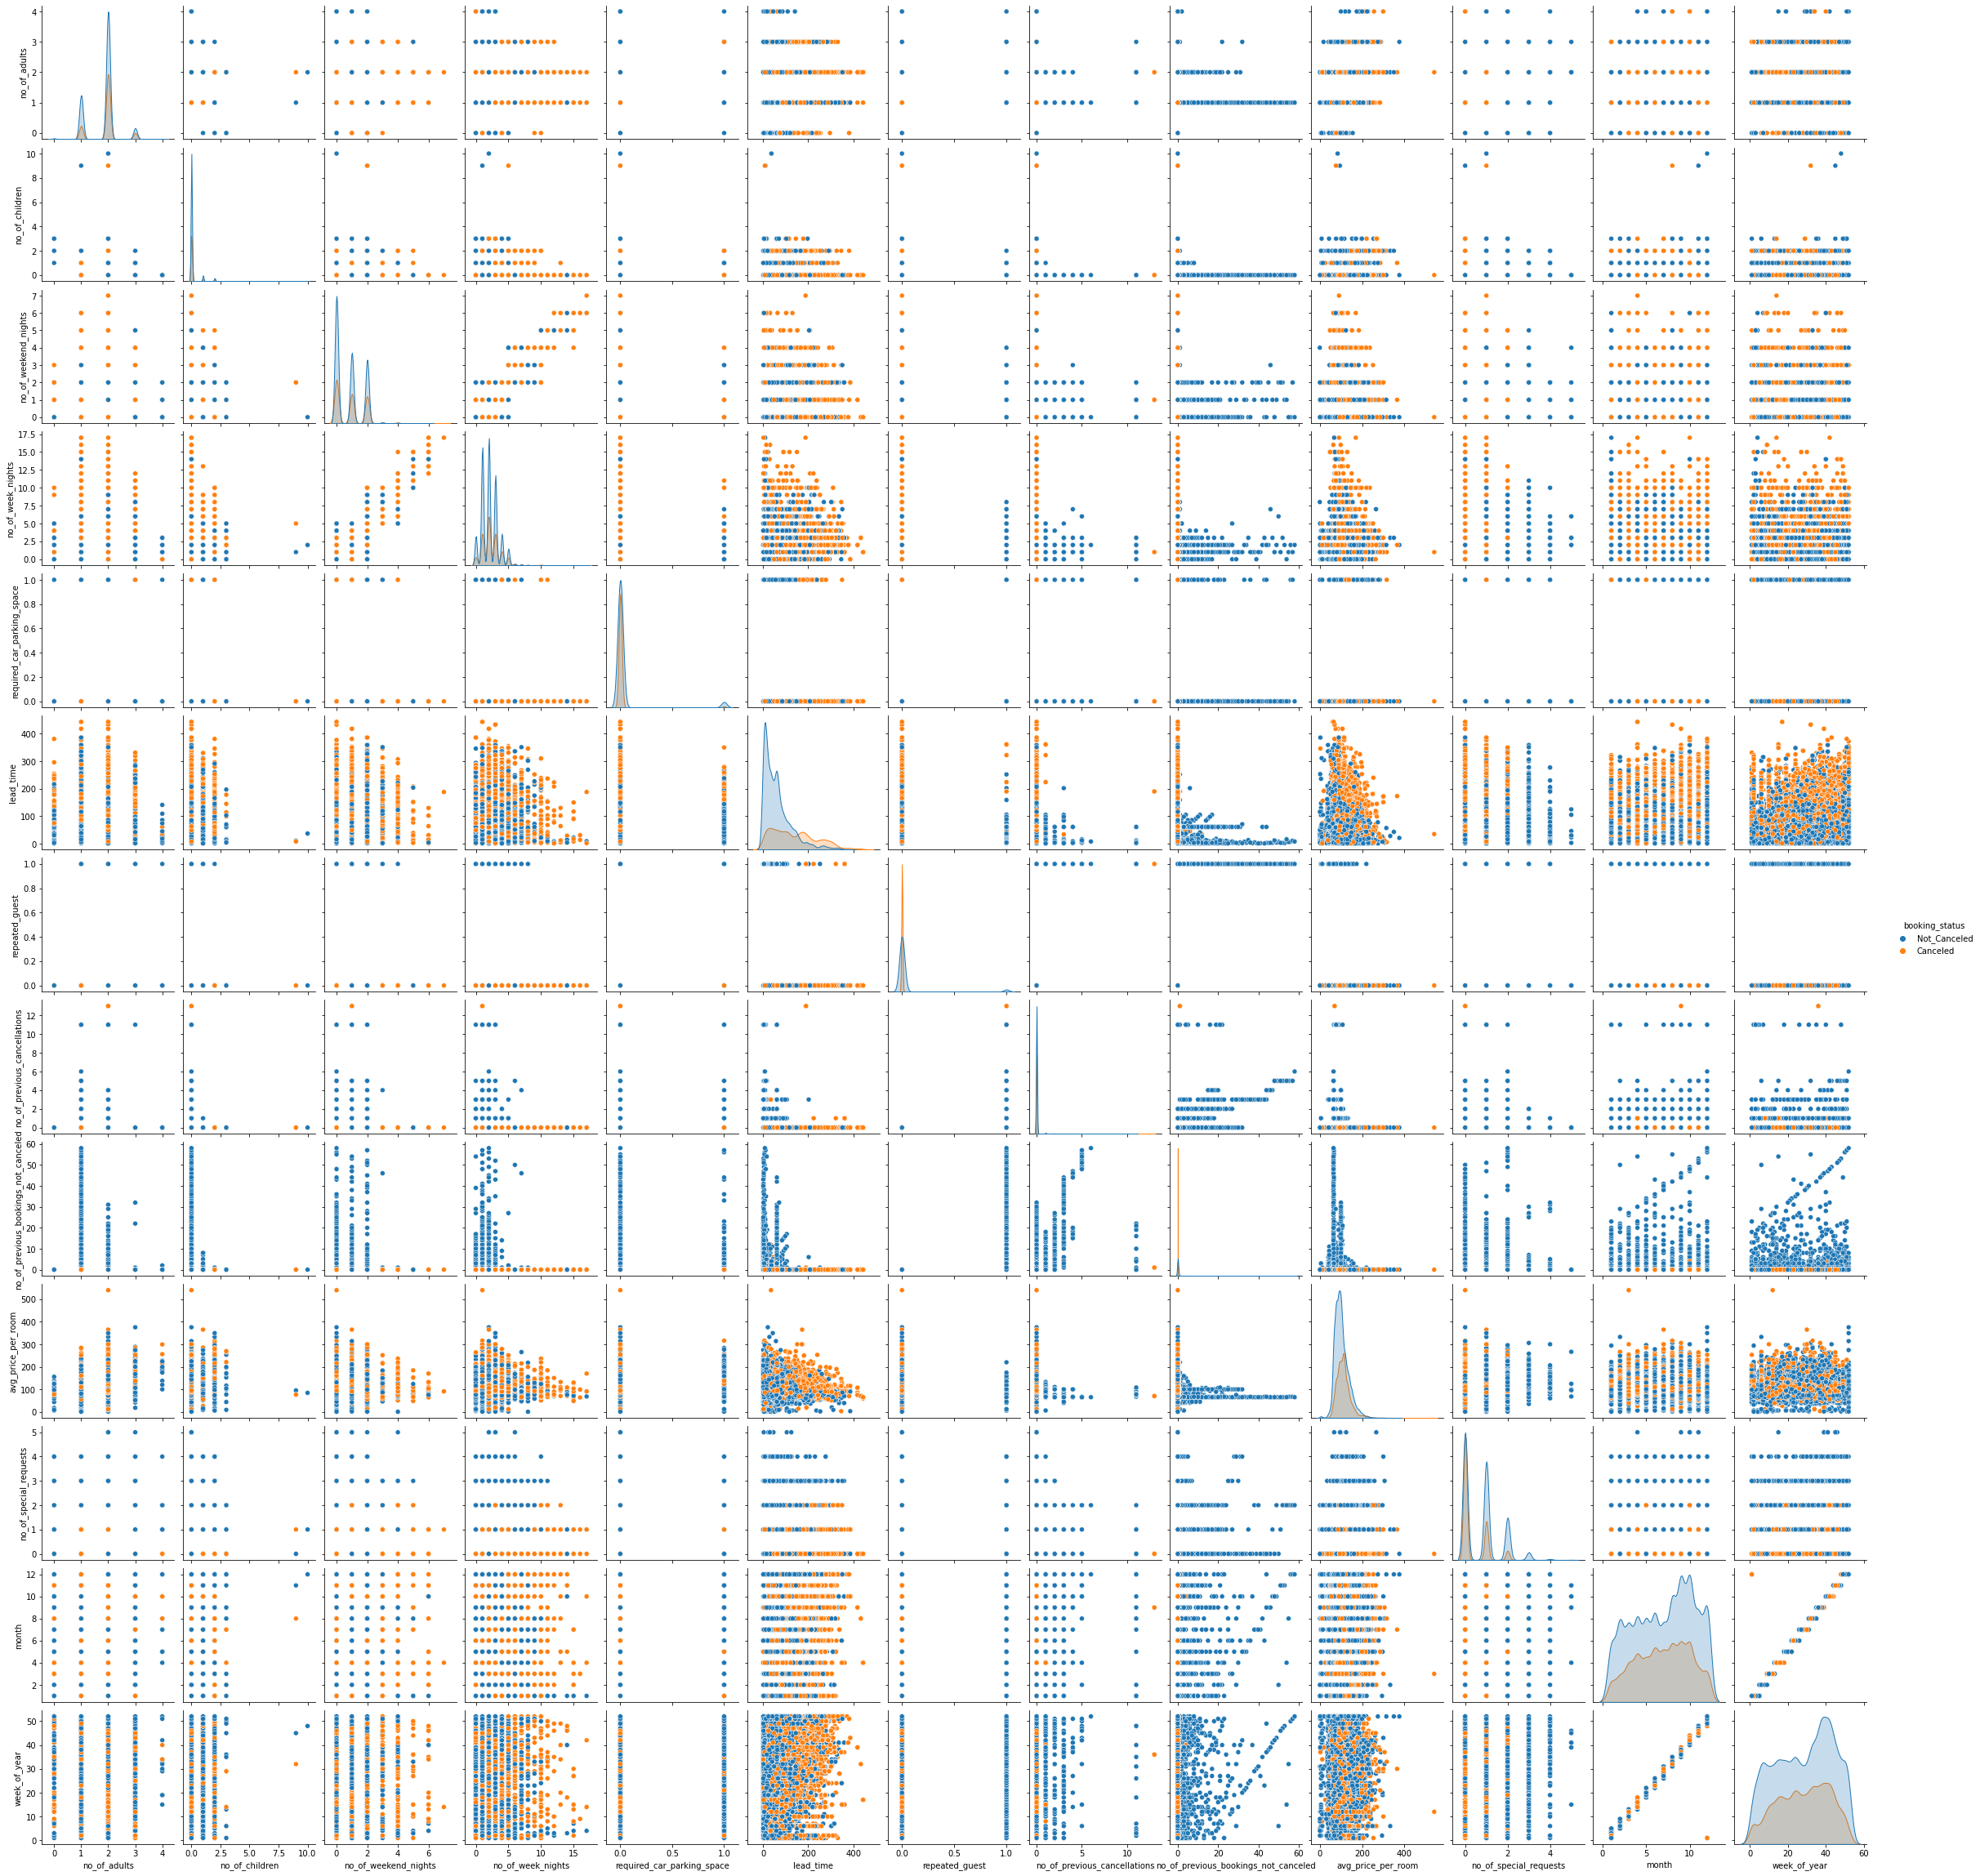

In [93]:
sns.pairplot(data, hue="booking_status")
plt.show()

- There are overlaps i.e., no clear distinction in the distribution of variables for people who have defaulted and did not default.
- Let's explore this further with the help of other plots.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

#### Functions to treat outliers by flooring and capping


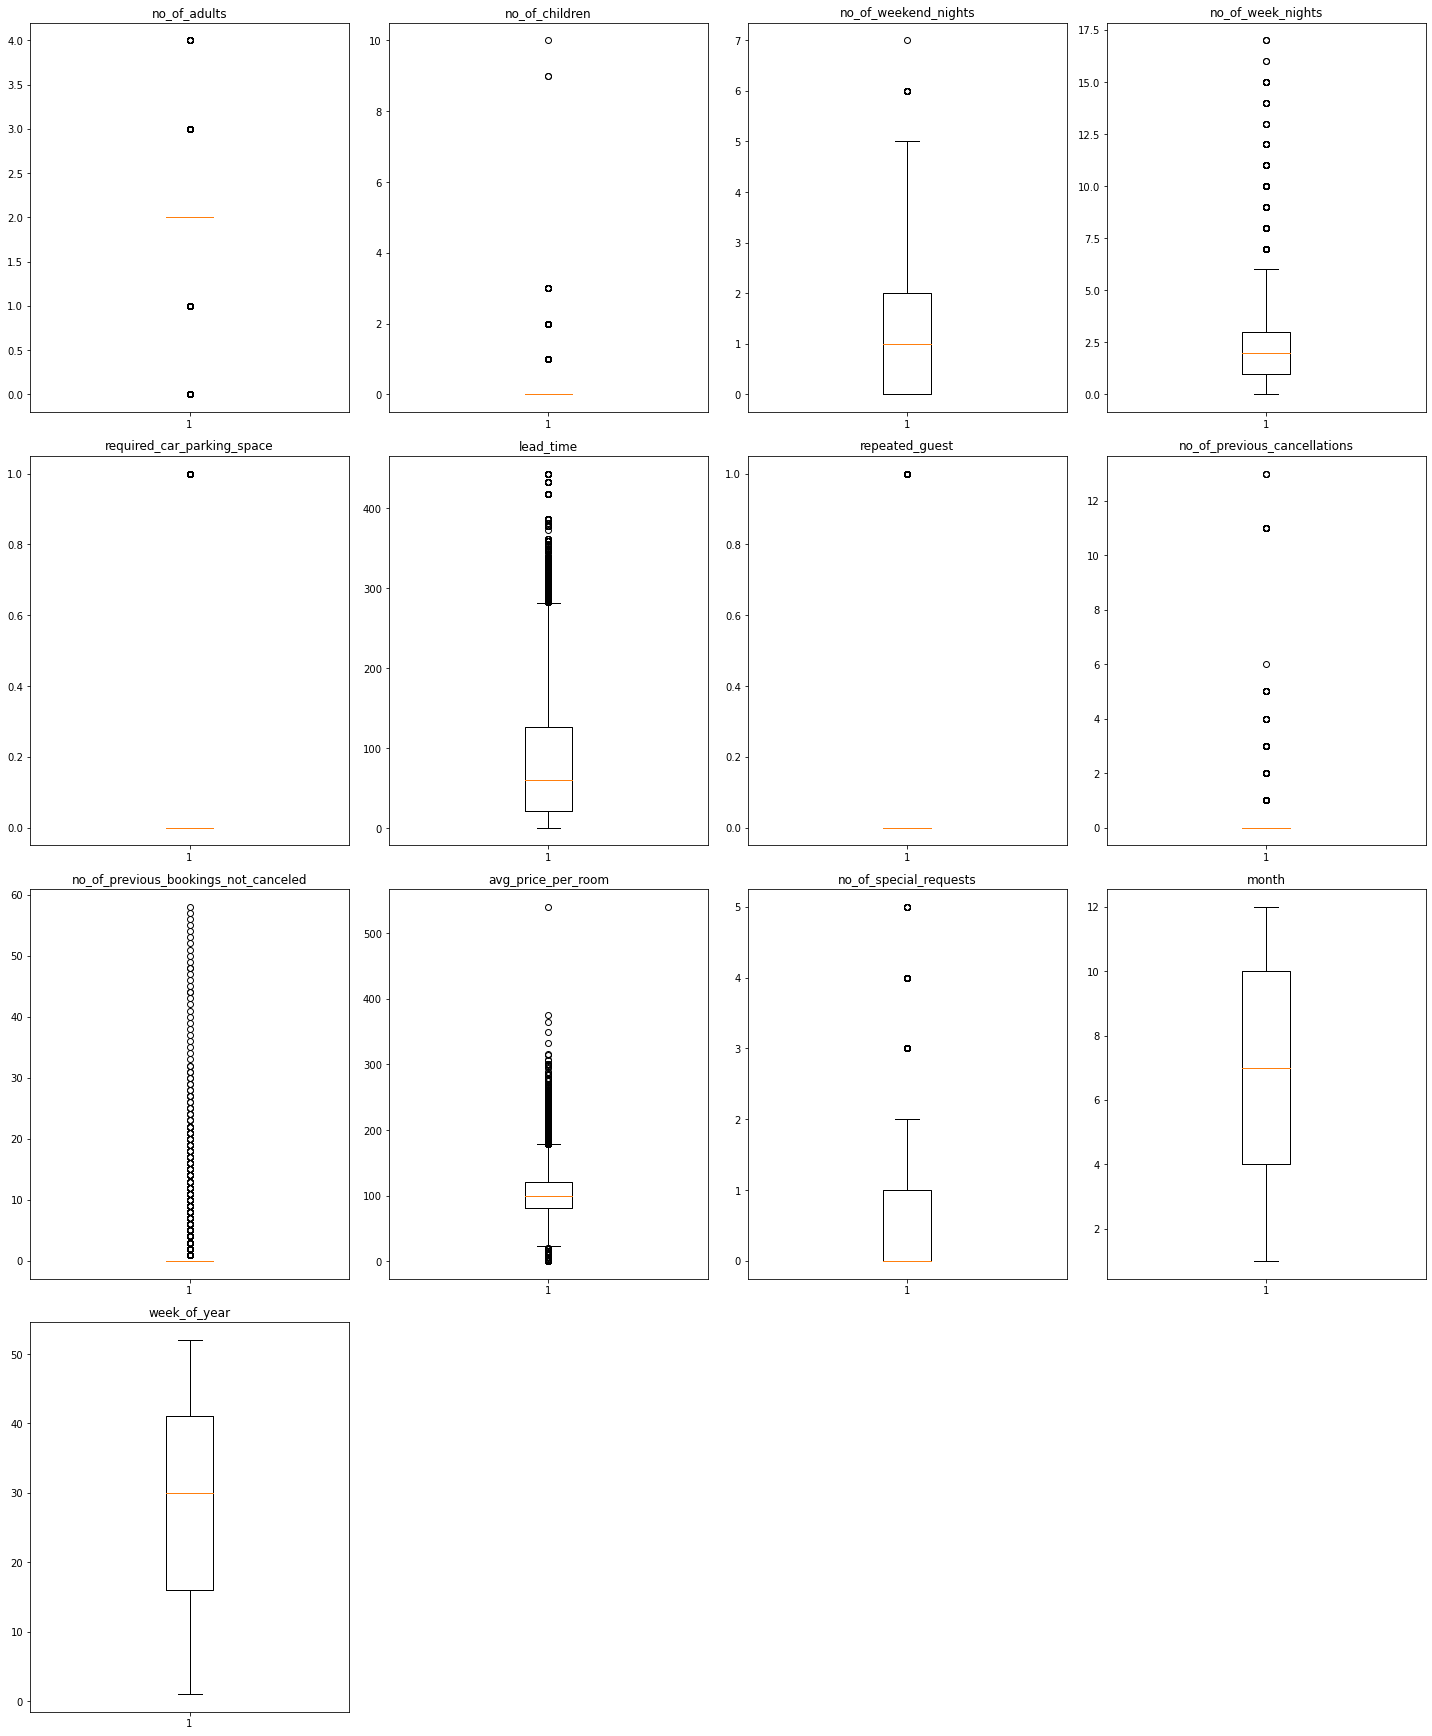

In [94]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [95]:
# Drop target, date and categorical attributes
df_num = data.drop(
['type_of_meal_plan', 'required_car_parking_space',
 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'no_of_special_requests'],
    axis=1,
).describe()

df_num.T

count   mean   std  min   25%    50%  \
no_of_adults                         36238.00   1.85  0.52 0.00  2.00   2.00   
no_of_children                       36238.00   0.11  0.40 0.00  0.00   0.00   
no_of_weekend_nights                 36238.00   0.81  0.87 0.00  0.00   1.00   
no_of_week_nights                    36238.00   2.20  1.41 0.00  1.00   2.00   
lead_time                            36238.00  87.45 84.52 1.00 22.00  61.00   
no_of_previous_cancellations         36238.00   0.02  0.37 0.00  0.00   0.00   
no_of_previous_bookings_not_canceled 36238.00   0.15  1.75 0.00  0.00   0.00   
avg_price_per_room                   36238.00 104.94 32.68 0.50 81.00 100.00   
month                                36238.00   6.96  3.26 1.00  4.00   7.00   
week_of_year                         36238.00  28.43 14.33 1.00 16.00  30.00   

                                        75%    max  
no_of_adults                           2.00   4.00  
no_of_children                         0.00  10.00  
no_of_weekend_nights                   2.00   7.00  
no_of_week_nights                      3.00  17.00  
lead_time                            126.00 443.00  
no_of_previous_cancellations           0.00  13.00  
no_of_previous_bookings_not_canceled   0.00  58.00  
avg_price_per_room                   120.00 540.00  
month                                 10.00  12.00  
week_of_year                          41.00  52.00

In [96]:
#Outlier Detection

# Note: The Zscore method b/c std dev is 3 shows no outliers ... I am conflicted, but will proceed with outlier treatment.



from scipy.stats import zscore

# Compute absolute z-scores
zscore = np.abs(zscore(df_num))
df_zscores = pd.DataFrame(data=zscore, columns=df_num.columns)

# Sum z-scores greater than 3 and group by feature
outliers = pd.DataFrame(
    df_zscores[df_zscores > 3].count(), columns=["Number of Outliers"]
)

# Calculate percentage make up in each feature
outliers["Percentage in Feature"] = (
    outliers["Number of Outliers"].apply(lambda x: x / data.shape[0] * 100).round(2)
)
outliers = outliers.reset_index()
outliers

index  Number of Outliers  \
0                          no_of_adults                   0   
1                        no_of_children                   0   
2                  no_of_weekend_nights                   0   
3                     no_of_week_nights                   0   
4                             lead_time                   0   
5          no_of_previous_cancellations                   0   
6  no_of_previous_bookings_not_canceled                   0   
7                    avg_price_per_room                   0   
8                                 month                   0   
9                          week_of_year                   0   

   Percentage in Feature  
0                   0.00  
1                   0.00  
2                   0.00  
3                   0.00  
4                   0.00  
5                   0.00  
6                   0.00  
7                   0.00  
8                   0.00  
9                   0.00

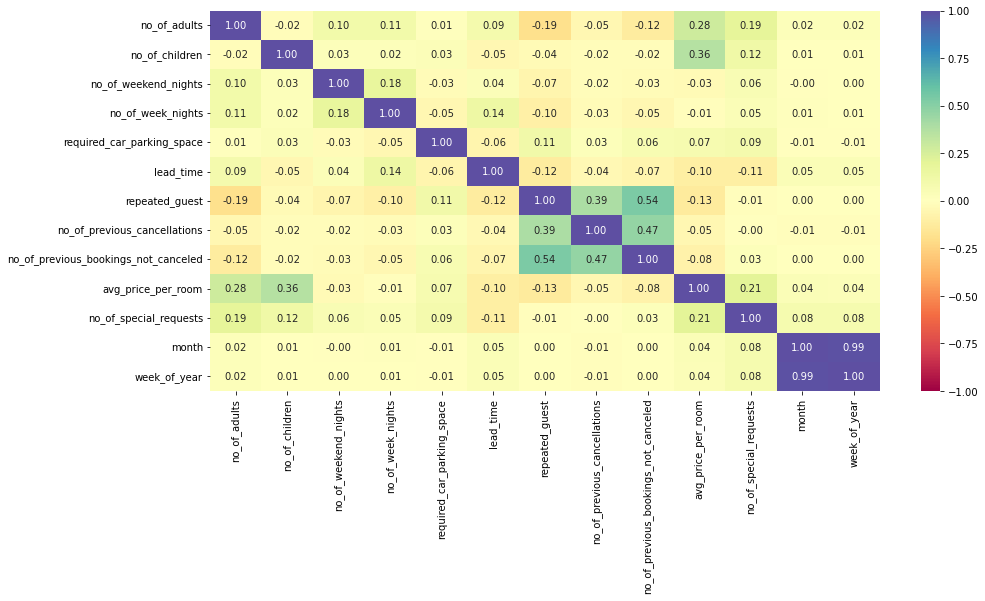

In [97]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# FINAL EDA Summary #

<div class="alert alert-block alert-info"><b>Insight:</b> 
 
AFTER ALL data preprocessing this is what we end up with: 
    
Basic Info    
- Number of variables 18
- Number of observations 36238
- Missing cells 0
- Missing cells (%) 0.0%
- Duplicate rows 0
- Duplicate rows (%) 0.0%
- Total size in memory 5.0 MiB
- Average record size in memory 144.0 B
- Numeric 11
- Categorical 7

SUMMARY OF CORRELATIONS & OTHER FACTS.
1.	month is highly correlated with week_of_year
2.	week_of_year is highly correlated with month
3.	month is highly correlated with week_of_year
4.	week_of_year is highly correlated with month
5.	month is highly correlated with week_of_year
6.	week_of_year is highly correlated with month
7.	booking_status is highly correlated with lead_time
8.	no_of_previous_bookings_not_canceled is highly correlated with repeated_guest and 1 other fields
9.	no_of_week_nights is highly correlated with no_of_weekend_nights
10.	lead_time is highly correlated with booking_status
11.	no_of_children is highly correlated with room_type_reserved
12.	no_of_weekend_nights is highly correlated with no_of_week_nights
13.	repeated_guest is highly correlated with no_of_previous_bookings_not_canceled
14.	room_type_reserved is highly correlated with no_of_children
15.	month is highly correlated with week_of_year
16.	no_of_previous_cancellations is highly correlated with no_of_previous_bookings_not_canceled
17.	week_of_year is highly correlated with month
18.	no_of_previous_cancellations is highly skewed (γ1 = 25.19401422)
    ** We will drop either Month or Week
    
These columns have valid '0s'...these should not be treated!!!
- no_of_children has 33544 (92.6%) zeros
- no_of_weekend_nights has 16872 (46.6%) zeros
- no_of_week_nights has 2383 (6.6%) zeros
- no_of_previous_cancellations has 35901 (99.1%) zeros
- no_of_previous_bookings_not_canceled has 35429 (97.8%) zeros
- no_of_special_requests has 19751 (54.5%) zeros

  
</div>

# MODEL BUILDING - LOGISTIC REGRESSION & DECISION TREE APPROACHES #

# Logistic Regression Section #

In [98]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [99]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Data Preparation

In [100]:
# Month and Week are ~99% correlated so we need to drop 1
data.drop(['month'], axis = 1, inplace = True) 

In [101]:
# After the preprocssing steps we end up with dtypes: float64(3), int64(9), object(4)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   type_of_meal_plan                     36238 non-null  object 
 5   required_car_parking_space            36238 non-null  int64  
 6   room_type_reserved                    36238 non-null  object 
 7   lead_time                             36238 non-null  float64
 8   market_segment_type                   36238 non-null  object 
 9   repeated_guest                        36238 non-null  int64  
 10  no_of_previous_cancellations          36238 non-null  int64  
 11  no_of_previous_

In [102]:
# Let's check the cancelation ratio to make sure nothing has changed while we were doing the data changes.
n_true = len(data.loc[data["booking_status"] == 'Canceled'])
n_false = len(data.loc[data["booking_status"] == 'Not_Canceled'])
print(
    "Number of canceled reservations: {0} ({1:2.2f}%)".format(
        n_true, (n_true / (n_true + n_false)) * 100
    )
)
print(
    "Number of reservations not canceled: {0} ({1:2.2f}%)".format(
        n_false, (n_false / (n_true + n_false)) * 100
    )
)

Number of canceled reservations: 11878 (32.78%)
Number of reservations not canceled: 24360 (67.22%)


## ***************** Per the conflicting ZScore (even @ 3STD) ... I will not treat the outliers as recommended by the Project Office.

## Per Program Office  Academic Support 17 "Sometimes, there exists some meaningful information in the outliers as well. For this project, it is advised not to treat outliers to avoid singular matrix error." 
 

In [103]:
numerical_col

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'month',
 'week_of_year']

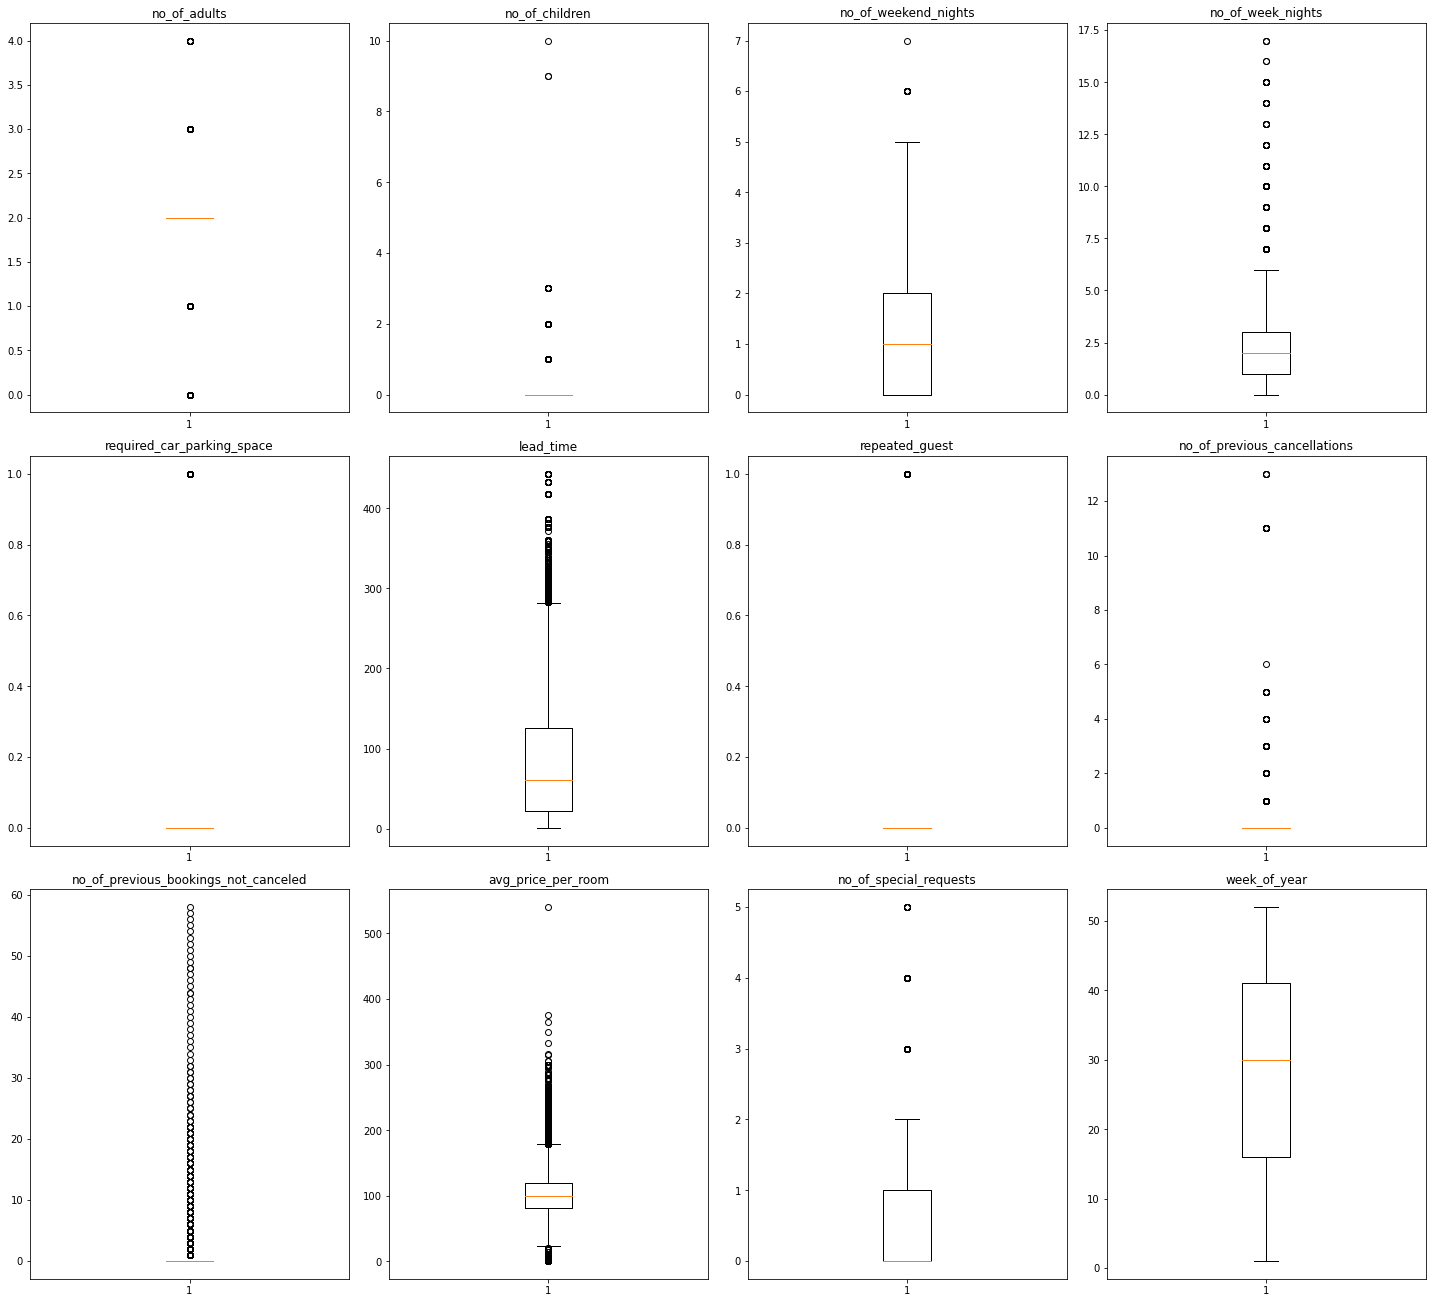

In [104]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [105]:
#Let's keep checking data types
data.describe().T

count   mean   std  min   25%    50%  \
no_of_adults                         36238.00   1.85  0.52 0.00  2.00   2.00   
no_of_children                       36238.00   0.11  0.40 0.00  0.00   0.00   
no_of_weekend_nights                 36238.00   0.81  0.87 0.00  0.00   1.00   
no_of_week_nights                    36238.00   2.20  1.41 0.00  1.00   2.00   
required_car_parking_space           36238.00   0.03  0.17 0.00  0.00   0.00   
lead_time                            36238.00  87.45 84.52 1.00 22.00  61.00   
repeated_guest                       36238.00   0.03  0.16 0.00  0.00   0.00   
no_of_previous_cancellations         36238.00   0.02  0.37 0.00  0.00   0.00   
no_of_previous_bookings_not_canceled 36238.00   0.15  1.75 0.00  0.00   0.00   
avg_price_per_room                   36238.00 104.94 32.68 0.50 81.00 100.00   
no_of_special_requests               36238.00   0.62  0.79 0.00  0.00   0.00   
week_of_year                         36238.00  28.43 14.33 1.00 16.00  30.00   

                                        75%    max  
no_of_adults                           2.00   4.00  
no_of_children                         0.00  10.00  
no_of_weekend_nights                   2.00   7.00  
no_of_week_nights                      3.00  17.00  
required_car_parking_space             0.00   1.00  
lead_time                            126.00 443.00  
repeated_guest                         0.00   1.00  
no_of_previous_cancellations           0.00  13.00  
no_of_previous_bookings_not_canceled   0.00  58.00  
avg_price_per_room                   120.00 540.00  
no_of_special_requests                 1.00   5.00  
week_of_year                          41.00  52.00

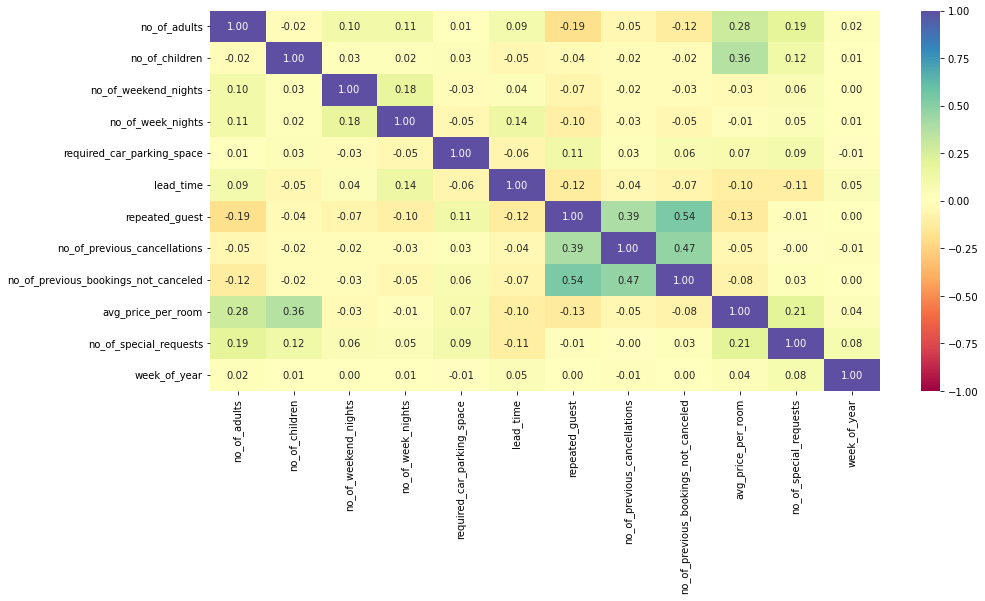

In [106]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [107]:
#Per the post outlier treatment there are a number of varibales that should be dropped 
#data.drop(['no_of_previous_cancellations'], axis = 1, inplace = True) 
#data.drop(['no_of_previous_bookings_not_canceled'], axis = 1, inplace = True) 
#data.drop(['no_of_adults'], axis = 1, inplace = True) 
#data.drop(['no_of_children'], axis = 1, inplace = True) 

In [108]:
# Encoding and replacing the words ' Not_Canceled and Canceled' with 0 and 1 to match required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes) convention
data["booking_status"] = data["booking_status"].replace("Not_Canceled", 0)
data["booking_status"] = data["booking_status"].replace("Canceled", 1)

data["type_of_meal_plan"] = data["type_of_meal_plan"].replace("Meal Plan ","")
data["type_of_meal_plan"] = data["type_of_meal_plan"].replace("Not Selected",0)
data

data["type_of_meal_plan"] = data["type_of_meal_plan"].replace("Meal Plan","")
data["type_of_meal_plan"] = data["type_of_meal_plan"].replace("Not Selected",0)

In [109]:
### Im going to create a copy of the data @ this point and use it for the decision tree analysis - let's create a copy of the data before it gets treated for outliers so that we can use all the prior changes w/ the outlier adjustments. 
data2 = data.copy()

In [110]:
#Creating training and test sets.
X = data.drop("booking_status", axis=1)
Y = data["booking_status"]

# creating dummy variables ... this function will create dummies for both Objects & Categories and we are dropping the first column bc all the information is present with the others.
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [111]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25366, 25)
Shape of test set :  (10872, 25)
Percentage of classes in training set:
0   0.67
1   0.33
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.68
1   0.32
Name: booking_status, dtype: float64


In [112]:
# the test and training sample sizes are almost (.67 vs .68) equal, so we can proceed with the model as the distrabutions are good.

### Logistic Regression (with Sklearn library)

In [113]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

#### Checking performance on training set

In [114]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [115]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.7980367420957187
Precision: 0.7341551849166063
Recall: 0.6060823754789272
F1: 0.6639994753066176


Accuracy is ok at ~80 ... which shows the model is over fitting compared to the recall # of .62%. More work can be done.

#### Checking performance on test set

In [116]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

In [117]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.7987490802060339
Precision: 0.7162249515190692
Recall: 0.6284741917186614
F1: 0.6694864048338369


The test results are almost the same ... Accuracy is ok at ~.80 ... which shows the model is over fitting compared to the recall # of .64 More work can be done.


- Recall on the train and test sets are comparable.

- This shows that the model is giving a generalised result.

### Logistic Regression (with statsmodels library)

In [118]:
# In this model the dependedent varibale is "booking status' so we need to drop that from the data set.
X = data.drop("booking_status", axis=1)
Y = data["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [119]:
X.head(5)

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0   1.00             2               0                     1   
1   1.00             2               0                     2   
2   1.00             1               0                     2   
3   1.00             2               0                     0   
4   1.00             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  repeated_guest  \
0                  2                           0     224.00               0   
1                  3                           0       5.00               0   
2                  1                           0       1.00               0   
3                  2                           0     211.00               0   
4                  1                           0      48.00               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  week_of_year  \
0               65.00                       0          6.00   
1              106.68                       1         24.00   
2               60.00                       0          9.00   
3              100.00                       0         20.00   
4               94.50                       0         44.00   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               1                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                 

In [120]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25366
Model:                          Logit   Df Residuals:                    25340
Method:                           MLE   Df Model:                           25
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:                  0.3165
Time:                        11:27:44   Log-Likelihood:                -10986.
converged:                      False   LL-Null:                       -16073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.7129      0.253    -10.721      0.000      -3.209      -2.217
no_of_adults                             0.1062      

It ran!!! AFter all of that 'singualr matrix' error codes, i simpliefied the model and went back from the beginning and the work was worht it. Based on the intial results there are some P values >.05 that will need to be inspected closer.

In [121]:
X_train.head(5)

const  no_of_adults  no_of_children  no_of_weekend_nights  \
4124    1.00             2               0                     0   
31349   1.00             3               0                     0   
10601   1.00             2               0                     0   
26095   1.00             2               0                     0   
9017    1.00             2               0                     1   

       no_of_week_nights  required_car_parking_space  lead_time  \
4124                   1                           0     289.00   
31349                  4                           0     107.00   
10601                  1                           0       4.00   
26095                  4                           0      52.00   
9017                   2                           0     142.00   

       repeated_guest  no_of_previous_cancellations  \
4124                0                             0   
31349               0                             0   
10601               0                             0   
26095               0                             0   
9017                0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
4124                                      0               67.00   
31349                                     0              152.10   
10601                                     0               90.00   
26095                                     0               63.75   
9017                                      0              125.33   

       no_of_special_requests  week_of_year  type_of_meal_plan_Meal Plan 2  \
4124                        0         42.00                              0   
31349                       0         34.00                              0   
10601                       0          7.00                              0   
26095                       0         36.00                              0   
9017                        1         36.00                              0   

       type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
4124                               0                               0   
31349                              0                               0   
10601                              0                               1   
26095                              0                               1   
9017                               0                               0   

       room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
4124                                0                               0   
31349                               0                               0   
10601                               0                               0   
26095                               0                               0   
9017                                0                               0   

       room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
4124                                0                               0   
31349                               1                               0   
10601                               0                               0   
26095                               0                               0   
9017                                0                               0   

       room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
4124                                0                               0   
31349                               0                               0   
10601                               0                               0   
26095                               0                               0   
9017                                0                               0   

       market_segment_type_Complementary  market_segment_type_Corporate  \
4124                                   0                              0   
31349                                  0                              0   
10601            

**Observations**

- Negative values of the coefficient shows that probability of customer canceling decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer canceling increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearity that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [122]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  303.79
no_of_adults                             1.33
no_of_children                           2.00
no_of_weekend_nights                     1.07
no_of_week_nights                        1.10
required_car_parking_space               1.03
lead_time                                1.20
repeated_guest                           1.80
no_of_previous_cancellations             1.28
no_of_previous_bookings_not_canceled     1.56
avg_price_per_room                       1.83
no_of_special_requests                   1.24
week_of_year                             1.02
type_of_meal_plan_Meal Plan 2            1.22
type_of_meal_plan_Meal Plan 3            1.03
type_of_meal_plan_Not Selected           1.24
room_type_reserved_Room_Type 2           1.10
room_type_reserved_Room_Type 3           1.00
room_type_reserved_Room_Type 4           1.35
room_type_reserved_Room_Type 5           1.03
room_type_reserved_Room_Type 6           2.01

* None of the variables exhibit high multicollinearity, except no_of_previous_bookings_not_canceled so we we will have to address it. The summary is not reliable yet
* Let's remove the insignificant features (p-value>0.05).


In [123]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'week_of_year', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Offline', 'market_segment_type_Online']


In [124]:
# creating a new training set
X_train3 = X_train[
    
['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations',
 'avg_price_per_room', 'no_of_special_requests', 'week_of_year', 
 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 
 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 
 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 
 'market_segment_type_Offline', 'market_segment_type_Online']

    
      
    
    
].astype(float)

In [125]:
logit3 = sm.Logit(y_train, X_train3)
lg3 = logit3.fit(disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25366
Model:                          Logit   Df Residuals:                    25346
Method:                           MLE   Df Model:                           19
Date:                Mon, 22 Nov 2021   Pseudo R-squ.:                  0.3148
Time:                        11:27:45   Log-Likelihood:                -11014.
converged:                       True   LL-Null:                       -16073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.9163      0.121    -32.379      0.000      -4.153      -3.679
no_of_adults                       0.0919      0.037      2.491      0.

In [126]:
X_train3.head(2)

const  no_of_adults  no_of_children  no_of_weekend_nights  \
4124    1.00          2.00            0.00                  0.00   
31349   1.00          3.00            0.00                  0.00   

       no_of_week_nights  required_car_parking_space  lead_time  \
4124                1.00                        0.00     289.00   
31349               4.00                        0.00     107.00   

       repeated_guest  no_of_previous_cancellations  avg_price_per_room  \
4124             0.00                          0.00               67.00   
31349            0.00                          0.00              152.10   

       no_of_special_requests  week_of_year  type_of_meal_plan_Not Selected  \
4124                     0.00         42.00                            0.00   
31349                    0.00         34.00                            0.00   

       room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
4124                             0.00                            0.00   
31349                            0.00                            1.00   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
4124                             0.00                            0.00   
31349                            0.00                            0.00   

       room_type_reserved_Room_Type 7  market_segment_type_Offline  \
4124                             0.00                         1.00   
31349                            0.00                         0.00   

       market_segment_type_Online  
4124                         0.00  
31349                        1.00

* The above columns are the significant column.
* We see that the loop has removed the constant also but we will need it to build the logistic regression model. So along with the significant variables we will keep the 'const' column as well.

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train3* as the final ones and *lg3* as final model.**

### Coefficient interpretations

* Coefficient of Duration is positive; an increase in these will lead to an increase in chances of a customer being a defaulter.
* Coefficients of Age, Sex_male, Savings account_rich, checking account_moderate, Purpose_radio/TV is negative; an increase in these will lead to a decrease in chances of a customer being a defaulter.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [127]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T



const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds          0.02          1.10            1.30                  1.18   
Change_odd% -98.01          9.62           29.67                 17.98   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                      1.04                        0.22       1.02   
Change_odd%               3.64                      -77.65       1.58   

             repeated_guest  no_of_previous_cancellations  avg_price_per_room  \
Odds                   0.05                          1.36                1.02   
Change_odd%          -95.47                         35.82                1.84   

             no_of_special_requests  week_of_year  \
Odds                           0.23          1.00   
Change_odd%                  -76.95         -0.36   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                   1.32                            0.60   
Change_odd%                           32.04                          -40.17   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                   0.86                            0.59   
Change_odd%                          -14.12                          -41.07   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                   0.36                            0.27   
Change_odd%                          -63.90                          -73.27   

             market_segment_type_Offline  market_segment_type_Online  
Odds                                0.42                        2.30  
Change_odd%                       -58.26                      129.82

### Coefficient interpretations

* # of adults and children have as they go up, the likiehoold of canceling goes up.
* Interestingly, if you reserve a parking spot the chances canceling go down by 77%
* 95% reduction in cancelation if you are a repeat guest.
* ~77% reduction in likeihood of cancelation when a special request is made.
* Online ... have the highest likiehood of cancelation odds going up.

`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

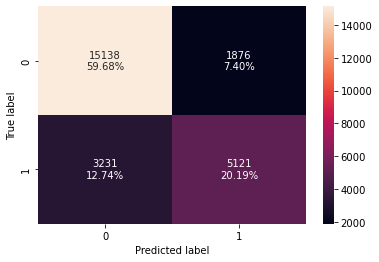

In [128]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [129]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0      0.80    0.61       0.73 0.67

#### ROC-AUC

* ROC-AUC on training set

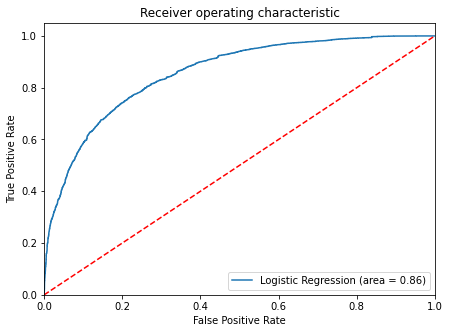

In [130]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is a low recall and ROC-AUC score.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [131]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.32949519958447787


#### Checking model performance on training set

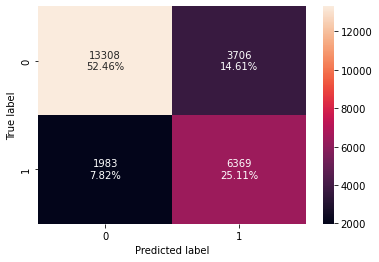

In [132]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [133]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision   F1
0      0.78    0.76       0.63 0.69

* Model performance has improved.
* Model is giving a recall of 0.76 as compared to initial model which was giving a recall of .61. 
* Precision has decreased from 0.73 to 0.63.

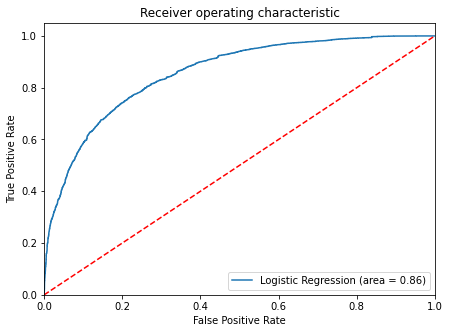

In [134]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Let's use Precision-Recall curve and see if we can find a better threshold

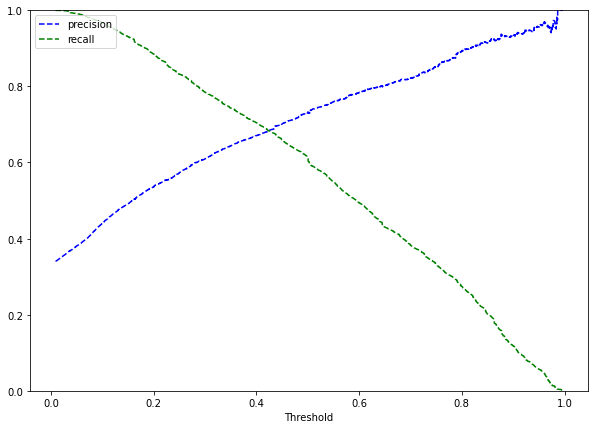

In [135]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.42 we will get equal precision and recall but taking a step back and selecting value around 0.36 will provide a higher recall and a good precision.

In [136]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

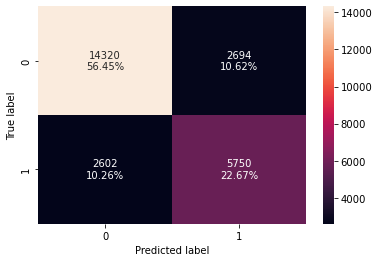

In [137]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [138]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision   F1
0      0.79    0.69       0.68 0.68

* Recall has improved as compared to the initial model.
* Model is giving a better performance with 0.42 threshold found using AUC-ROC curve.

### Model Performance Summary

In [139]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.35 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df = models_train_comp_df.reset_index()
models_train_comp_df

Training performance comparison:


index  Logistic Regression sklearn  Logistic Regression-0.35 Threshold  \
0   Accuracy                         0.80                                0.78   
1     Recall                         0.61                                0.76   
2  Precision                         0.73                                0.63   
3         F1                         0.67                                0.69   

   Logistic Regression-0.42 Threshold  
0                                0.79  
1                                0.69  
2                                0.68  
3                                0.68

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [140]:
X_test3 = X_test[X_train3.columns].astype(float)

**Using model with default threshold**

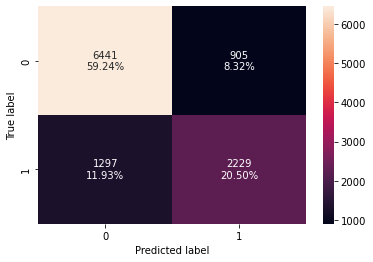

In [141]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [142]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision   F1
0      0.80    0.63       0.71 0.67

* ROC curve on test set

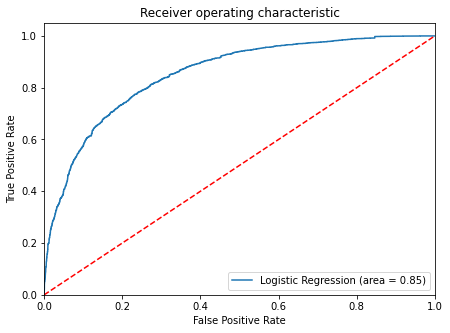

In [143]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

##### **Using model with threshold=0.33** 

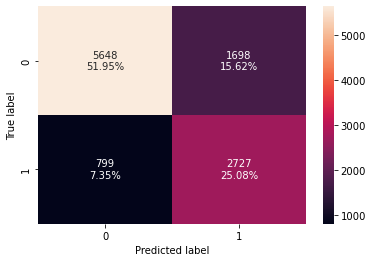

In [144]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [145]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision   F1
0      0.77    0.77       0.62 0.69

**Using model with threshold = 0.42**

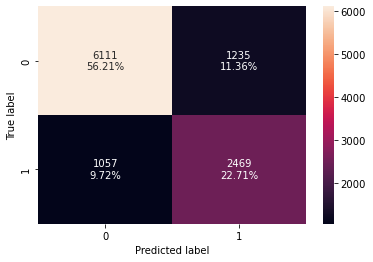

In [146]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [147]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision   F1
0      0.79    0.70       0.67 0.68

### Model performance summary

### training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.35 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

In [148]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.33 Threshold  \
Accuracy                          0.80                                0.77   
Recall                            0.63                                0.77   
Precision                         0.71                                0.62   
F1                                0.67                                0.69   

           Logistic Regression-0.42 Threshold  
Accuracy                                 0.79  
Recall                                   0.70  
Precision                                0.67  
F1                                       0.68

### Conclusion

- All the models are giving a generalized performance on training and test set.
- The highest recall is 77% on the training & had the same result on the testing data!!
- Using the model with default threshold the model will give a low recall but good precision scores - This model will help the hotel resell rooms but lose on potential customers.
- Using the model with 0.33 threshold the model will give a high recall but low precision scores - This model will help the hotel identify potential customers that may cancel but tmay not be precise and charge higher cancelation fees than they should. 
- Using the model with 0.42 threshold the model will give a balance recall and precision score - This model will help the hotel maintain a balance in identifying potential customer that will cancel vs those that will not and charge the cancelation fee to those that shouldn't get it.

## Recommendations

- From our logistic regression model we identified that no_of_previous_cancellations is a significant predictor of a customer canceling. 
- From our logistic regression model we identified that no_children as a strong predictor of not canceling and requireing parking ... discounts or reduction in cancelation fee could target these segments.   
- We  could use all of these coefficeints to do A/B testing with different programs: 
  
To drive the likeihood of decreasing cancelations build pricing and programs around:  

- 1 build incentive programs/price reductions to become a "repeated guest" to build loyalty
- 2 room customization / special requests / pillows to other types beyond the basic categories we have
- 3 upgrade @ a minimal cost of "free" to categories 6 & 7  
- 4 discounted parking in advance required_car_parking_space 	   

Online booking is barrier free, and most of the cancelations come from that segment:

- 1 consider limiting the number of cancelations allowed w/in a 6month period
- 2 consider lower cost, but non-refunable reservations
- 3 consider implementing % of fee based for canceling an online reservaation
- 4 consider allowing reservations up-to > 90 to be changed or canceled, with an increasing cancelation fee as the date is < 90days. Within 7days consider "no refund"


===========================================  




## Building a Decision Tree model

In [149]:
#This is a new copy of the data with changes that were done to keep the data sets seperate.
data2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   type_of_meal_plan                     36238 non-null  object 
 5   required_car_parking_space            36238 non-null  int64  
 6   room_type_reserved                    36238 non-null  object 
 7   lead_time                             36238 non-null  float64
 8   market_segment_type                   36238 non-null  object 
 9   repeated_guest                        36238 non-null  int64  
 10  no_of_previous_cancellations          36238 non-null  int64  
 11  no_of_previous_

In [150]:
# Follow these steps to remove spaces-special charachters-punction
cleaned_column_names = (
    data2.columns.str.strip()
    .str.replace("((?<=[a-z0-9])[A-Z]|(?!^)[A-Z](?=[a-z]))", r"_\1")
    .str.lower()
    .str.replace("[ _-]+", "_")
    .str.replace("[}{)(><.!?\\\\:;,-]", "")
)
data2.columns = cleaned_column_names

# Drop "Meal Plan" & "Room Type" and just keep the order number
data2["type_of_meal_plan"] = data2["type_of_meal_plan"].str.replace("Meal Plan",'')
data2["type_of_meal_plan"] = data2["type_of_meal_plan"].replace("Not Selected", 0)


data2['room_type_reserved'] = data2['room_type_reserved'].str.replace('Room_Type','')


# Encoding and replacing the words ' Not_Canceled and Canceled' with 0 and 1 to match required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes) convention
data2["booking_status"] = data2["booking_status"].replace("Not_Canceled", 0)
data2["booking_status"] = data2["booking_status"].replace("Canceled", 1)

In [151]:
#Change the market segment to numbers 1(online) 2(offline) 3(Corp) 4(comp) and 5(Aviation) 
data2.market_segment_type.value_counts()

Online           23194
Offline          10518
Corporate         2011
Complementary      390
Aviation           125
Name: market_segment_type, dtype: int64

#Change the market segment to numbers 0(online) 1(offline) 2(Corp) 3(comp) and 4(Aviation) 

data2['market_segment_type'] = data2['market_segment_type'].replace("Online", 0)
data2['market_segment_type'] = data2['market_segment_type'].replace("Offline", 1)
data2['market_segment_type'] = data2['market_segment_type'].replace("Corporate", 2)
data2['market_segment_type'] = data2['market_segment_type'].replace("Complementary", 3)
data2['market_segment_type'] = data2['market_segment_type'].replace("Aviation", 4)
data2.market_segment_type.value_counts()

In [152]:
data2.describe(include=["object", "bool"])

type_of_meal_plan room_type_reserved market_segment_type
count              36238              36238               36238
unique                 4                  7                   5
top          Meal Plan 1        Room_Type 1              Online
freq               27802              28105               23194

In [153]:
data2.tail(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
36265             2               0                     1                  3   
36266             2               0                     2                  2   
36267             2               0                     1                  0   
36268             1               0                     0                  3   
36269             2               2                     0                  1   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
36265       Meal Plan 1                           0        Room_Type 1   
36266       Meal Plan 1                           0        Room_Type 2   
36267      Not Selected                           0        Room_Type 1   
36268       Meal Plan 1                           0        Room_Type 1   
36269       Meal Plan 1                           0        Room_Type 6   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time market_segment_type  repeated_guest  \
36265      15.00              Online               0   
36266       8.00              Online               0   
36267      49.00              Online               0   
36268     166.00             Offline               0   
36269      61.00              Online               0   
36270      85.00              Online               0   
36271     228.00              Online               0   
36272     148.00              Online               0   
36273      63.00              Online               0   
36274     207.00             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36265                             0                                     0   
36266                             0                                     0   
36267                             0                                     0   
36268                             0                                     0   
36269                             0                                     0   
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests  booking_status  \
36265              100.73                       0               0   
36266               85.96                       1               1   
36267               93.15                       0               1   
36268              110.00                       0               1   
36269              216.00                       0               1   
36270              167.80                       1               0   
36271               90.95                       2               1   
36272               98.39                       2               0   
36273               94.50                       0               1   
36274              161.67                       0               0   

       week_of_year  
36265         22.00  
36266         14.00  
36267         45.00 

In [154]:
data2.describe().T

count   mean   std  min   25%    50%  \
no_of_adults                         36238.00   1.85  0.52 0.00  2.00   2.00   
no_of_children                       36238.00   0.11  0.40 0.00  0.00   0.00   
no_of_weekend_nights                 36238.00   0.81  0.87 0.00  0.00   1.00   
no_of_week_nights                    36238.00   2.20  1.41 0.00  1.00   2.00   
required_car_parking_space           36238.00   0.03  0.17 0.00  0.00   0.00   
lead_time                            36238.00  87.45 84.52 1.00 22.00  61.00   
repeated_guest                       36238.00   0.03  0.16 0.00  0.00   0.00   
no_of_previous_cancellations         36238.00   0.02  0.37 0.00  0.00   0.00   
no_of_previous_bookings_not_canceled 36238.00   0.15  1.75 0.00  0.00   0.00   
avg_price_per_room                   36238.00 104.94 32.68 0.50 81.00 100.00   
no_of_special_requests               36238.00   0.62  0.79 0.00  0.00   0.00   
booking_status                       36238.00   0.33  0.47 0.00  0.00   0.00   
week_of_year                         36238.00  28.43 14.33 1.00 16.00  30.00   

                                        75%    max  
no_of_adults                           2.00   4.00  
no_of_children                         0.00  10.00  
no_of_weekend_nights                   2.00   7.00  
no_of_week_nights                      3.00  17.00  
required_car_parking_space             0.00   1.00  
lead_time                            126.00 443.00  
repeated_guest                         0.00   1.00  
no_of_previous_cancellations           0.00  13.00  
no_of_previous_bookings_not_canceled   0.00  58.00  
avg_price_per_room                   120.00 540.00  
no_of_special_requests                 1.00   5.00  
booking_status                         1.00   1.00  
week_of_year                          41.00  52.00

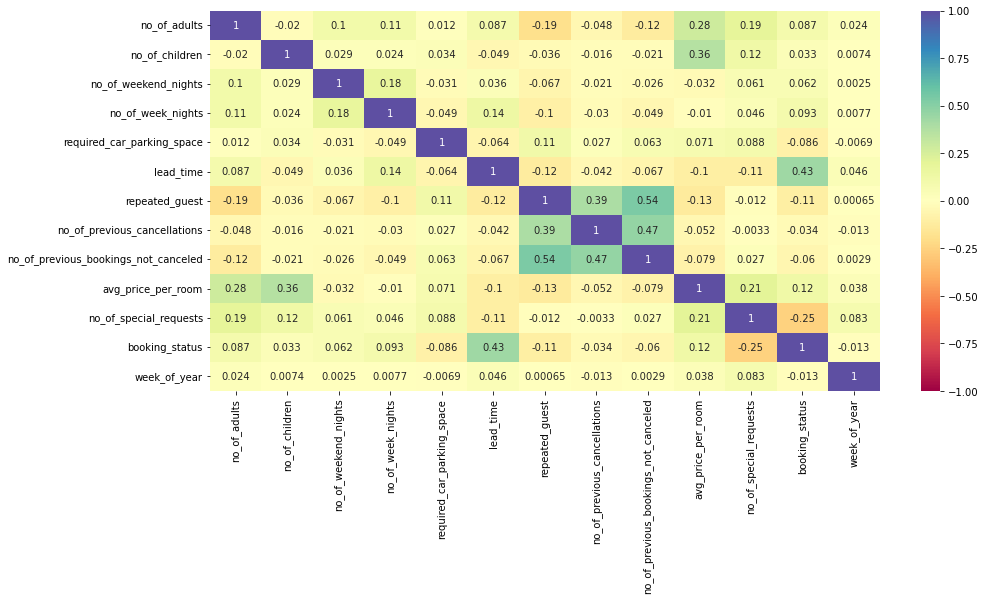

In [155]:
plt.figure(figsize=(15, 7))
sns.heatmap(data2.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

In [156]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   type_of_meal_plan                     36238 non-null  object 
 5   required_car_parking_space            36238 non-null  int64  
 6   room_type_reserved                    36238 non-null  object 
 7   lead_time                             36238 non-null  float64
 8   market_segment_type                   36238 non-null  object 
 9   repeated_guest                        36238 non-null  int64  
 10  no_of_previous_cancellations          36238 non-null  int64  
 11  no_of_previous_

# creating dummy varibles
dummy_data = pd.get_dummies(
    data2,
    columns=[
        "type_of_meal_plan",
        "room_type_reserved",
        

        
    ],
    drop_first=True,
)
dummy_data.head()

In [157]:
#Creating training and test sets.
X = data2.drop("booking_status", axis=1)
Y = data2["booking_status"]

# creating dummy variables ... this function will create dummies for both Objects & Categories and we are dropping the first column bc all the information is present with the others.
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [158]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25366, 25)
Shape of test set :  (10872, 25)
Percentage of classes in training set:
0   0.67
1   0.33
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.68
1   0.32
Name: booking_status, dtype: float64


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [159]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [160]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [161]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [162]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Checking model performance on training set

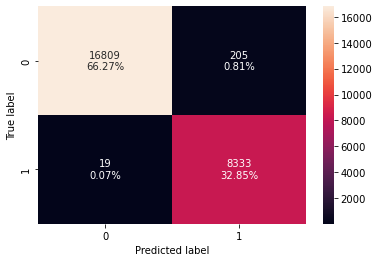

In [163]:
confusion_matrix_sklearn(model, X_train, y_train)

In [164]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9977250957854407


* Model is able to almost perfectly classify all the data points on the training set @ 99.7%.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.



#### Checking model performance on test set

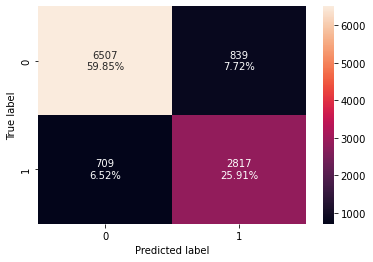

In [165]:
confusion_matrix_sklearn(model, X_test, y_test)

In [166]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.7989222915484969


* The model actually does OK on the test data although you can see the overfitting when comparing the 99.7% to the 79.1%.  

## Visualizing the Decision Tree

In [167]:
## creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

THIS IS SUPER IMPOSSIBLE TO READ ;)

In [168]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 90.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Complementary <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |   |   |   |   |   |--- week_of_year <= 7.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 65.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  65.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [5.55, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- week_of_year >  7.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |-

* The tree above is very complex and difficult to interpret.

In [169]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                      Imp
lead_time                            0.30
avg_price_per_room                   0.17
no_of_special_requests               0.14
week_of_year                         0.12
market_segment_type_Online           0.09
no_of_week_nights                    0.05
no_of_weekend_nights                 0.04
no_of_adults                         0.02
required_car_parking_space           0.01
market_segment_type_Offline          0.01
type_of_meal_plan_Not Selected       0.01
room_type_reserved_Room_Type 4       0.01
no_of_children                       0.01
repeated_guest                       0.00
type_of_meal_plan_Meal Plan 2        0.00
room_type_reserved_Room_Type 5       0.00
market_segment_type_Corporate        0.00
market_segment_type_Complementary    0.00
room_type_reserved_Room_Type 2       0.00
room_type_reserved_Room_Type 6       0.00
no_of_previous_bookings_not_canceled 0.00
room_type_reserved_Room_Type 7       0.00
no_of_previous_cancellations      

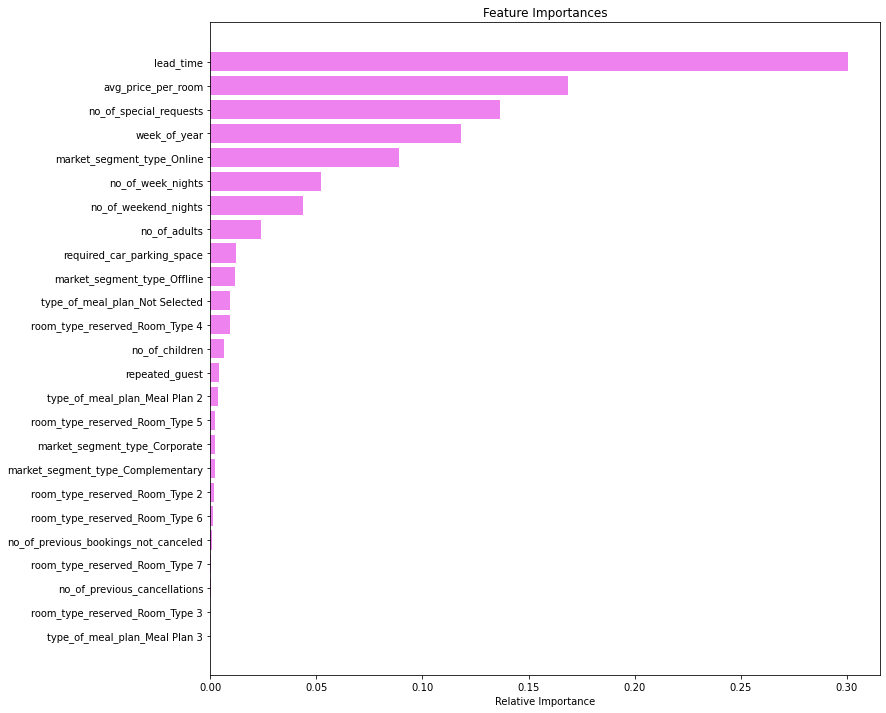

In [170]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Lead Time is the most important variable for predicting cancelations, then Avg Price, and thne week_of_year.


### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [171]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

#### Checking performance on training set

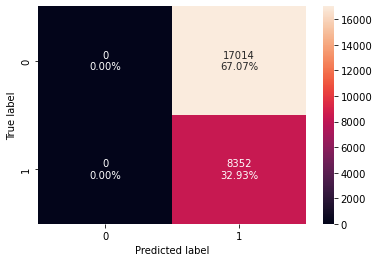

In [172]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [173]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 1.0


#### Checking performance on test set

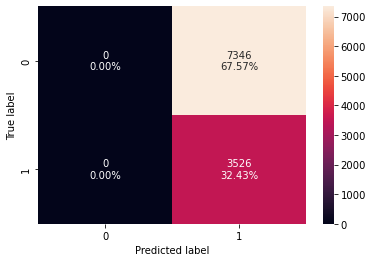

In [174]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [175]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 1.0


* The model is giving a generalized result now and slightly better performance on test.

## Visualizing the Decision Tree

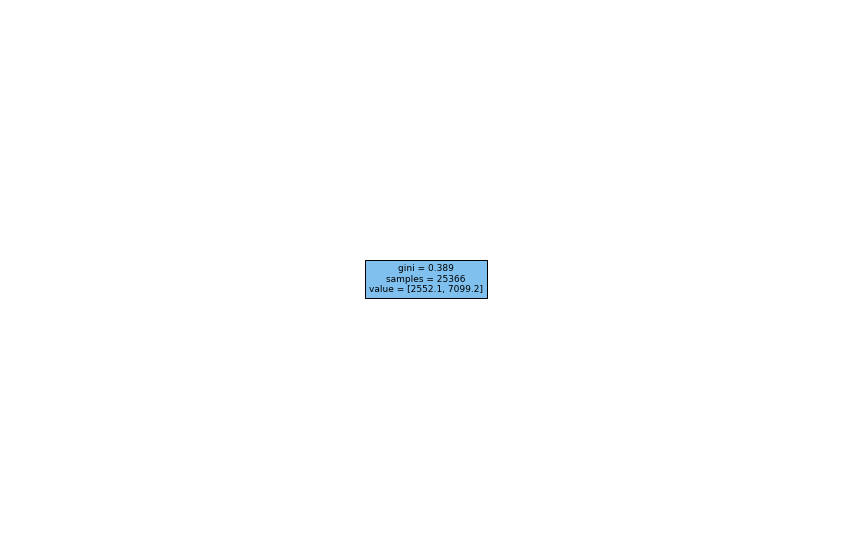

In [176]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [177]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- weights: [2552.10, 7099.20] class: 1



**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer books a reservation <=90 days in advance, no_of_special_requests <= 1.50, lead_time <= 8.50 they will cancel

|--- lead_time <= 90.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type <= 0.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- lead_time <= 8.50
|   |   |   |   |   |--- weights: [91.80, 162.35] class: 1

|   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |   |--- weights: [212.85, 221.00] class: 1

    You can keep readting the tree to find similar classes ... `Interpretations from other decision rules can be made similarly`

In [178]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                      Imp
no_of_adults                         0.00
type_of_meal_plan_Meal Plan 3        0.00
market_segment_type_Offline          0.00
market_segment_type_Corporate        0.00
market_segment_type_Complementary    0.00
room_type_reserved_Room_Type 7       0.00
room_type_reserved_Room_Type 6       0.00
room_type_reserved_Room_Type 5       0.00
room_type_reserved_Room_Type 4       0.00
room_type_reserved_Room_Type 3       0.00
room_type_reserved_Room_Type 2       0.00
type_of_meal_plan_Not Selected       0.00
type_of_meal_plan_Meal Plan 2        0.00
no_of_children                       0.00
week_of_year                         0.00
no_of_special_requests               0.00
avg_price_per_room                   0.00
no_of_previous_bookings_not_canceled 0.00
no_of_previous_cancellations         0.00
repeated_guest                       0.00
lead_time                            0.00
required_car_parking_space           0.00
no_of_week_nights                 

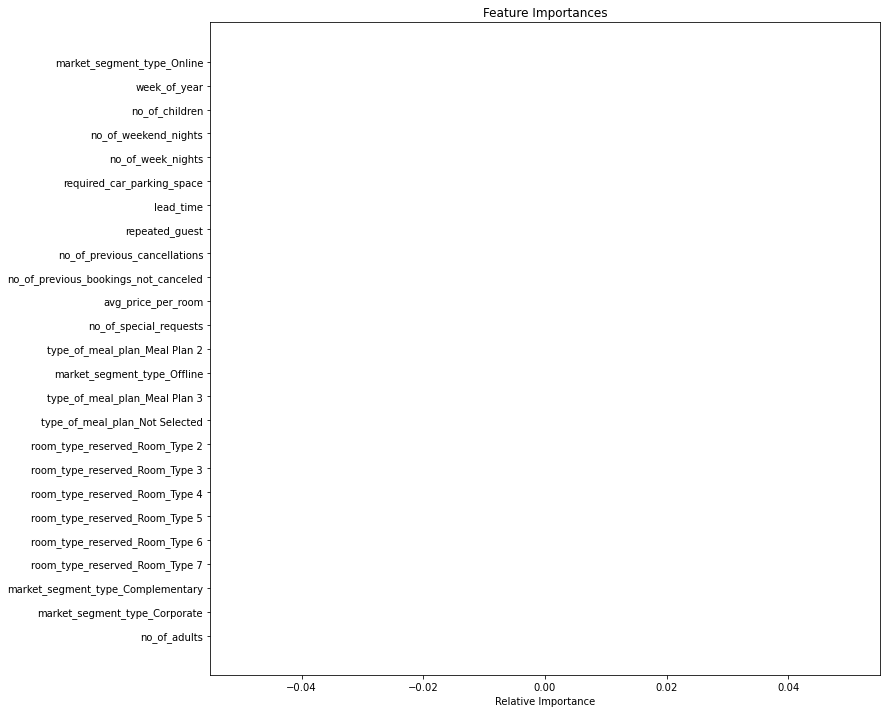

In [179]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree Lead Time  is the most important feature followed by No of Special Request = 2.

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [180]:
##Note I took the ABS value as alpha has to be between 0 and 1. There are some negative numbers in the data, so this resolves and allows the analysis to conintue.
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [181]:
pd.DataFrame(path)

ccp_alphas  impurities
0           0.00        0.01
1          -0.00        0.01
2           0.00        0.01
3           0.00        0.01
4           0.00        0.01
...          ...         ...
1991        0.00        0.27
1992        0.01        0.28
1993        0.01        0.29
1994        0.02        0.34
1995        0.05        0.39

[1996 rows x 2 columns]

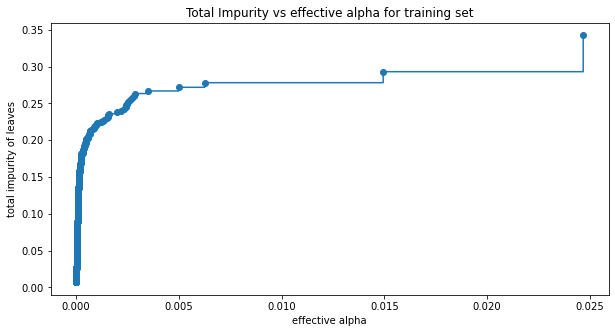

In [182]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [183]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0465238538099797



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

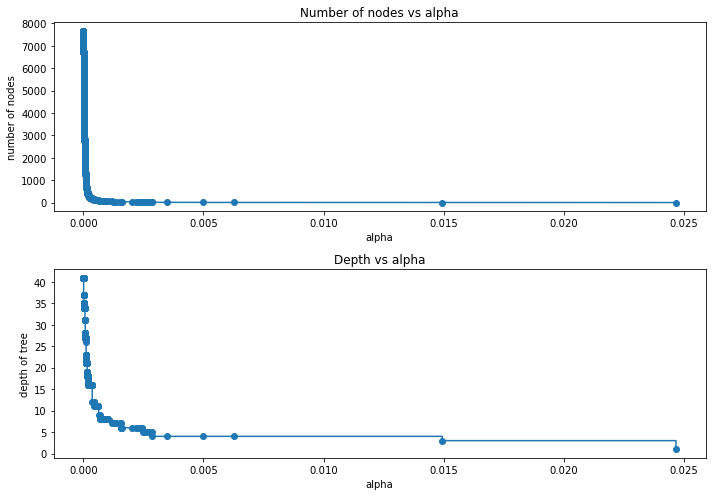

In [184]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [185]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.025 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002~3 retaining information and getting higher recall.**

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

In [ ]:
best_model.fit(X_train, y_train)

#### checking performance on training set

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

#### checking performance on test set

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

### Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with < 0.005 ccp_alpha**

In [ ]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

#### Checking performance on the training set

In [ ]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

#### Checking performance on the test set

In [ ]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [ ]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Exit rates and ProductRelated duration are the top two important features to predict customer sessions contributing to Revenue.

### Comparing all the decision tree models

In [ ]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### Conclusions

- We analyzed the "INNHotel" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to cancel their reservation or not. 
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Lead Time, 2 Special Request, Online, and 1 Special Request are the the most important variables in predicting customer cancelation or not. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

* According to the decision tree model - each of these paths will likely lead to correctly identifying a reservation that will get canceled:

While the decsion Trees allows us to make even more discrete A/B tests compared to the logistic model, the basic plrinciples are the same:

To drive the likeihood of decreasing cancelations build pricing and programs around:  

- 1 build incentive programs/price reductions to become a "repeated guest" to build loyalty
- 2 room customization / special requests / pillows to other types beyond the basic categories we have
- 3 upgrade @ a minimal cost of "free" to categories 6 & 7  
- 4 discounted parking in advance required_car_parking_space 	   

Online booking is barrier free, and most of the cancelations come from that segment:

- 1 consider limiting the number of cancelations allowed w/in a 6month period
- 2 consider lower cost, but non-refunable reservations
- 3 consider implementing % of fee based for canceling an online reservaation
- 4 consider allowing reservations up-to > 90 to be changed or canceled, with an increasing cancelation fee as the date is < 90days. Within 7days consider "no refund"


EXAMPLES - Each of these likely buckets of folks that will cancel could be target through A/B to test various levels of fees (Incentives)

1. Implement short term cancelation fees for any reservation made <= 90 days.
2. For all Corporate reservations that are on a weekend, implement a cancelation fees
3. For Online reservations where the lead time is lead_time <= 8.50, implement a non refunable "short term" premimum fee equal to 40% of the total stay and/or refund only 60%.
4. For example, for rooms >$200 consider inscreasing the cacelation fee.








# **Comparing Performance of both Logistic Regresssion & Decesion Trees**

While both models produce results, if you consider comparing the Logistic Regresss (Statsmodel & Sklearn) the following observations can be made


Logistic
1.   Logistic requires a lot more effort in terms of data cleaning and observation, which can be time consuming and error prone.
2.   Logistic reqression is much faster in terms of how quickly the analysis can take place based on current envirnoment
3. Logistic regression is easier to understand in terms of the coefficient meaning +/- and it's impact onm the dependendent variable
4. There performance was OK ... changing the threshold balanced the recall and precision resulting in a F1 score of .69
5. The main gap I see is there is still quite a bit of explainability that can not be discivered with the data we have.

Decision Tree
1. The results would "appear" initially to be better, but that is a red herring b/c the model is overfitting on the tarining data.
2. Hyperparameter tunning does appear to have very good results on both test and train, but may still be overfitting
3. The post-tuned tree is the model I would select, as it has performance better than that of the logistic model in terms of closing the recall gap, and amongst the other options of the decision tree.
4. The only draw back is that it is computational intensive and the results graphically are difficult to understand (vs coefficeints) which may be a personal level of comfort with the latter.

What also needs to be conisered is the production environment. If stable, menaing the data comes in with known defects and remains stable possibly the Logistic model can be used as a second check where the delat between the two becomes key metric or warning signal if something changes.

As for the decsiion tree, computationally the environment would need to be sized accordingly to ensure performance isn't an issue. If it is for some reason not feasible to run the DT in real-time ... use the Logistic model to screen the "easy" decesions and the DT to run a second pass against those that are not clearly candidates for approval.





In [ ]:
# Logistic Reggression testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

In [ ]:
# Decision Tree (training performance comparison)

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Decision Tree (testing performance comparison)

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df